In [20]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [21]:
def split_mean_std(dataframe):
    mean_df = dataframe.copy()
    std_df = dataframe.copy()

    for col in dataframe.columns:
        if col != 'index':
            mean_df[col] = dataframe[col].apply(lambda x: float(x.split(' ± ')[0]))
            std_df[col] = dataframe[col].apply(lambda x: float(x.split(' ± ')[1]))

    return mean_df,std_df


## RMSE

In [74]:
real_datalist = ["banknote","concrete_compression",
            # "california","climate_model_crashes",
            # "connectionist_bench_sonar","qsar_biodegradation",
            # "yeast","yacht_hydrodynamics"
            ]
#real_datalist = ["yacht_hydrodynamics"]

#syn_datalist = ["syn1"]


missing_type = "quantile"
missing_type = "diffuse"
missing_type = "logistic"
modellist = ["mean","knn","mice","XGB","missforest","mf","gain","mcflow","notmiwae","miwae","tabcsdi"]

#modellist = ["mean","knn","mice","gain","mf","gain"]


In [69]:
def make_rmse_list(missing_type,datalist,modellist):
    train_list = []
    test_list = []
    for dataname in datalist:
        train_df = pd.DataFrame()
        test_df = pd.DataFrame()
        for model in modellist:
            path = f"../results/{missing_type}/{dataname}"
            try:
                data = pd.read_csv(f"{path}/{model}/{missing_type}_RMSE.csv",index_col=0)
                train_df[f'{model}'] = data['train_rmse_mean'].map('{:.5f}'.format) + ' ± ' + data['train_rmse_std'].map('{:.3f}'.format)
                test_df[f'{model}'] = data['test_rmse_mean'].map('{:.5f}'.format) + ' ± ' + data['test_rmse_std'].map('{:.3f}'.format)
            except:
                train_df[f'{model}'] = "0 ± 0"
                test_df[f'{model}'] = "0 ± 0"
        train_df.to_csv(f"{path}/RMSE_train_results.csv")
        test_df.to_csv(f"{path}/RMSE_test_results.csv")
        train_list.append(train_df)
        test_list.append(test_df)
    return train_list,test_list

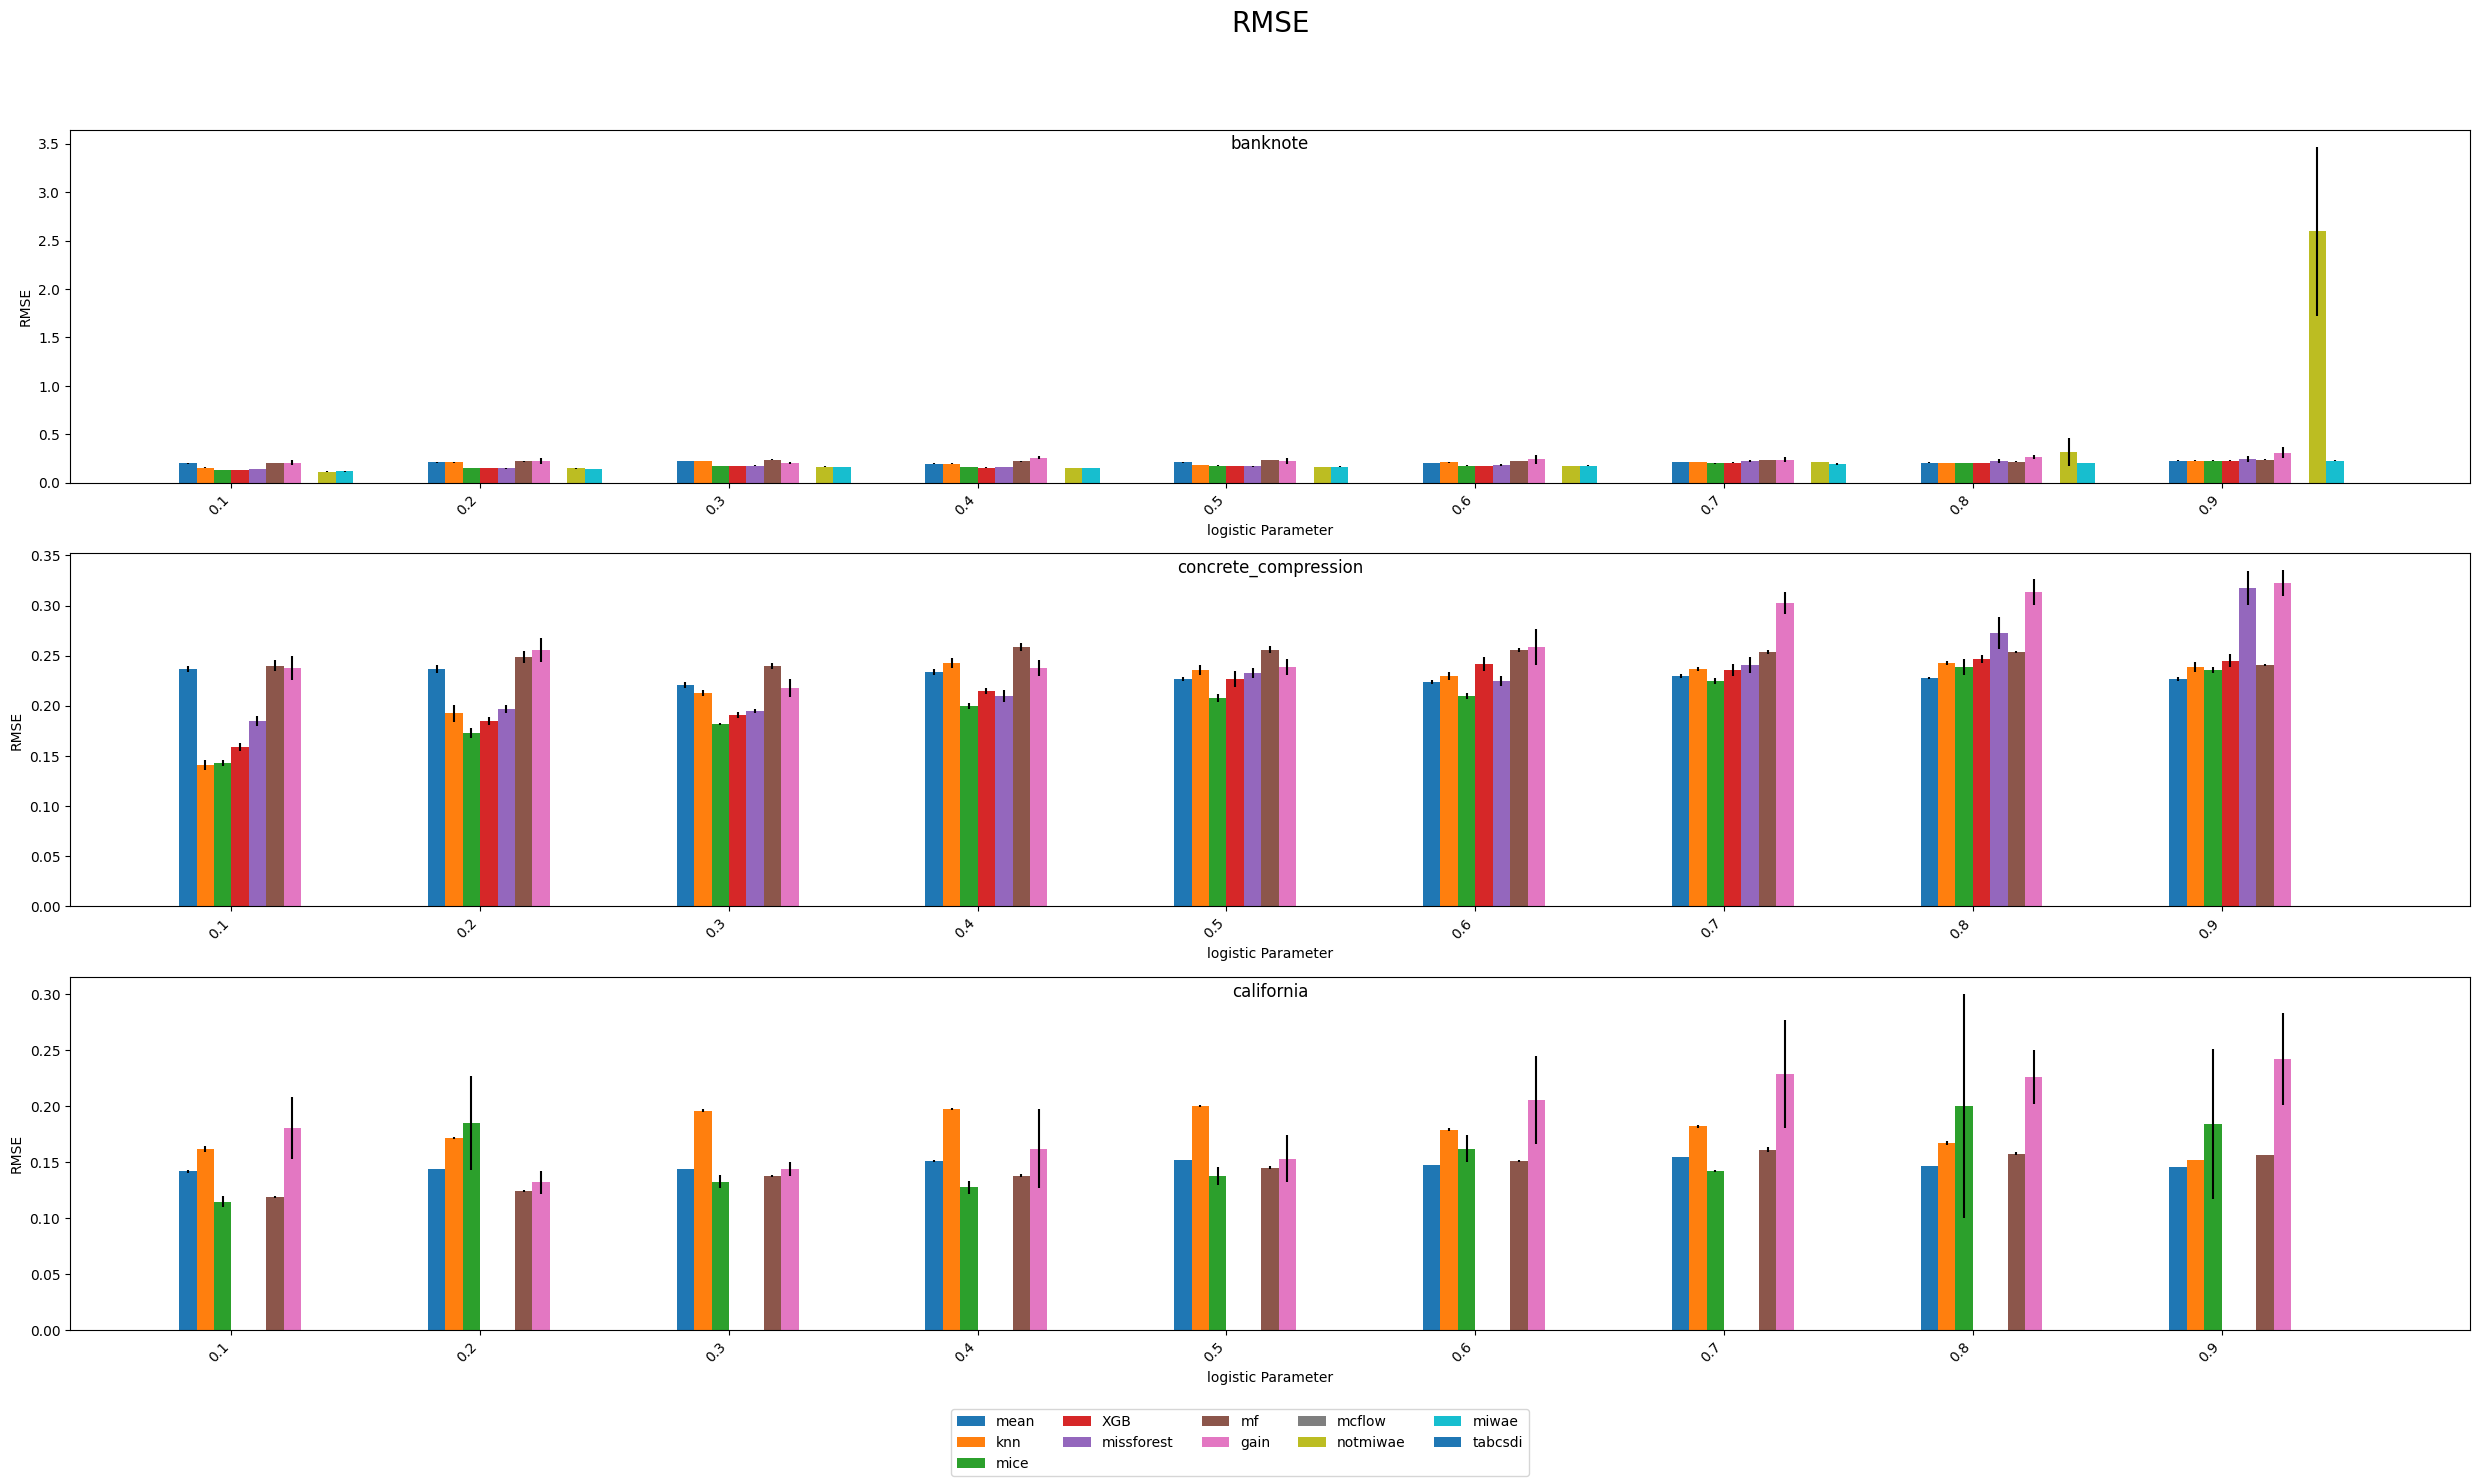

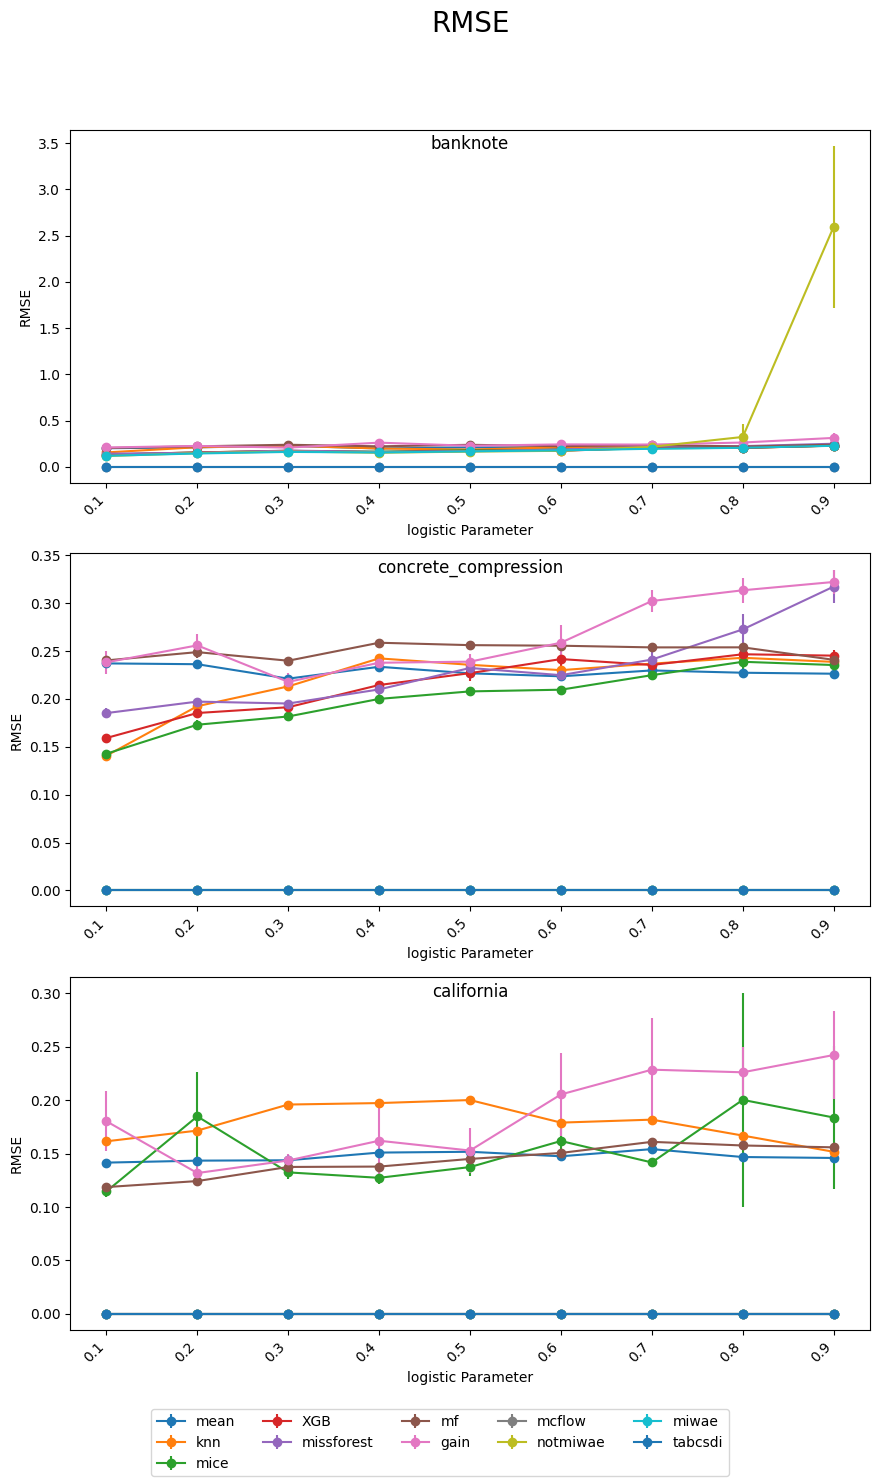

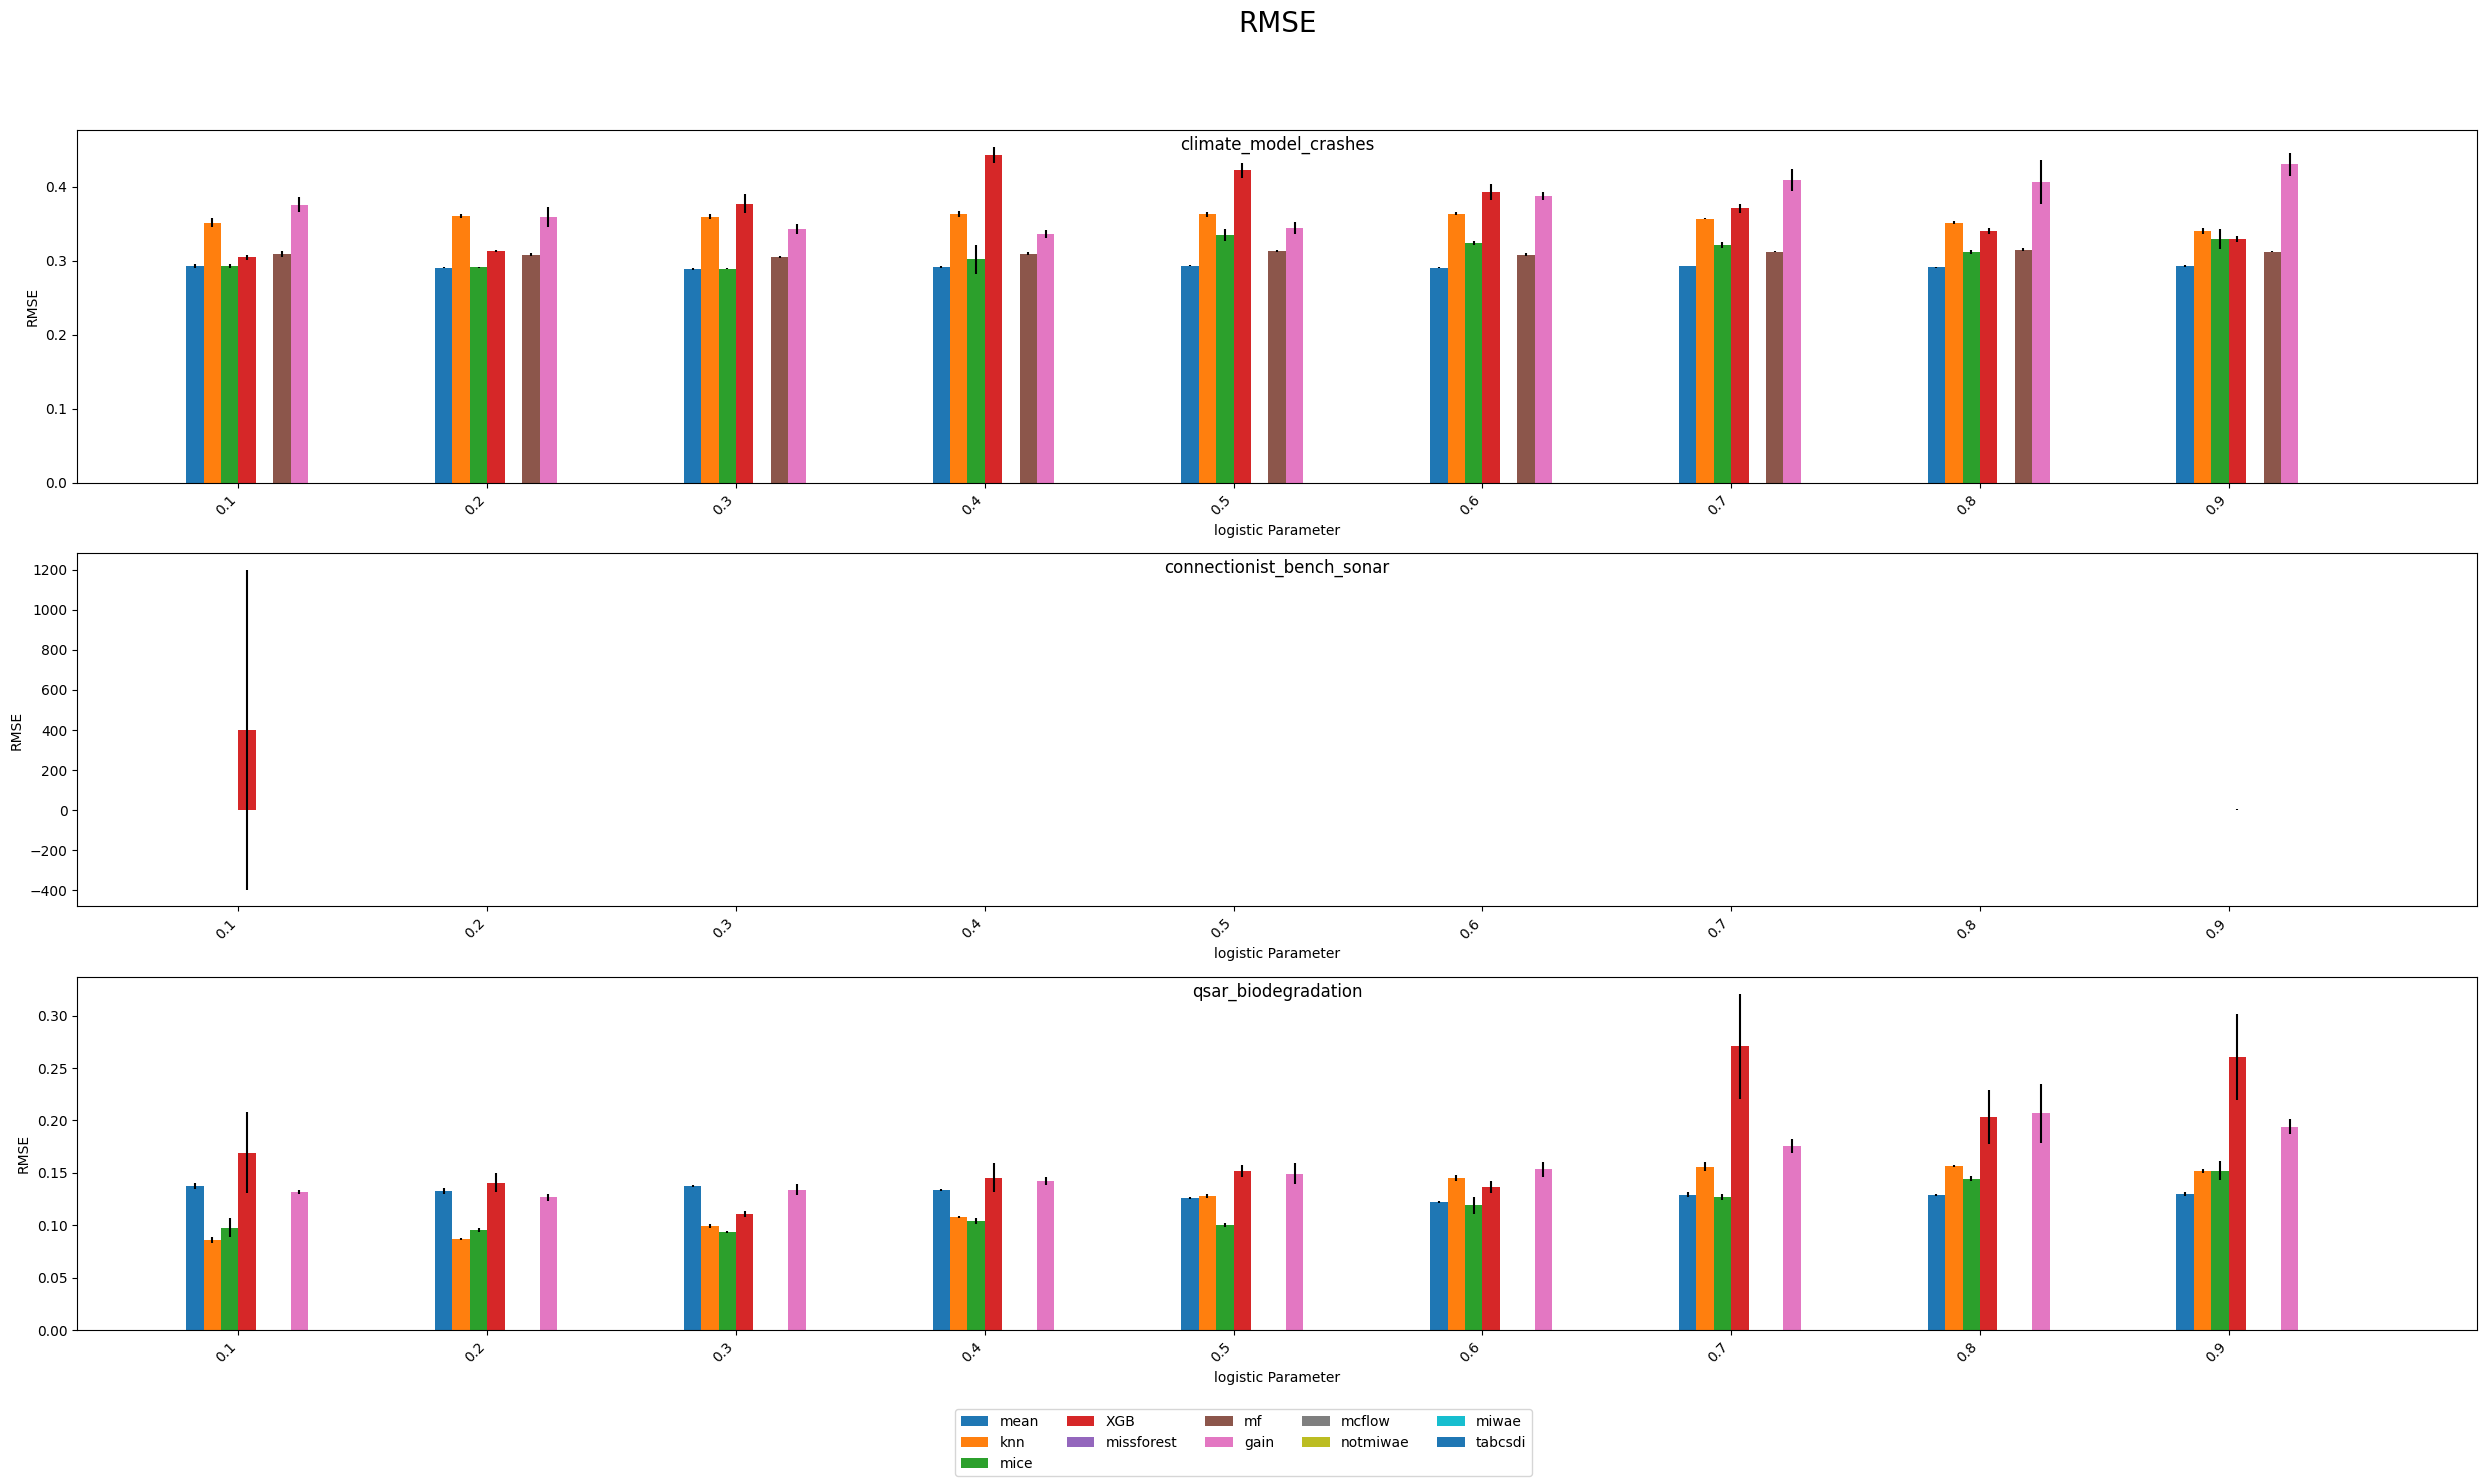

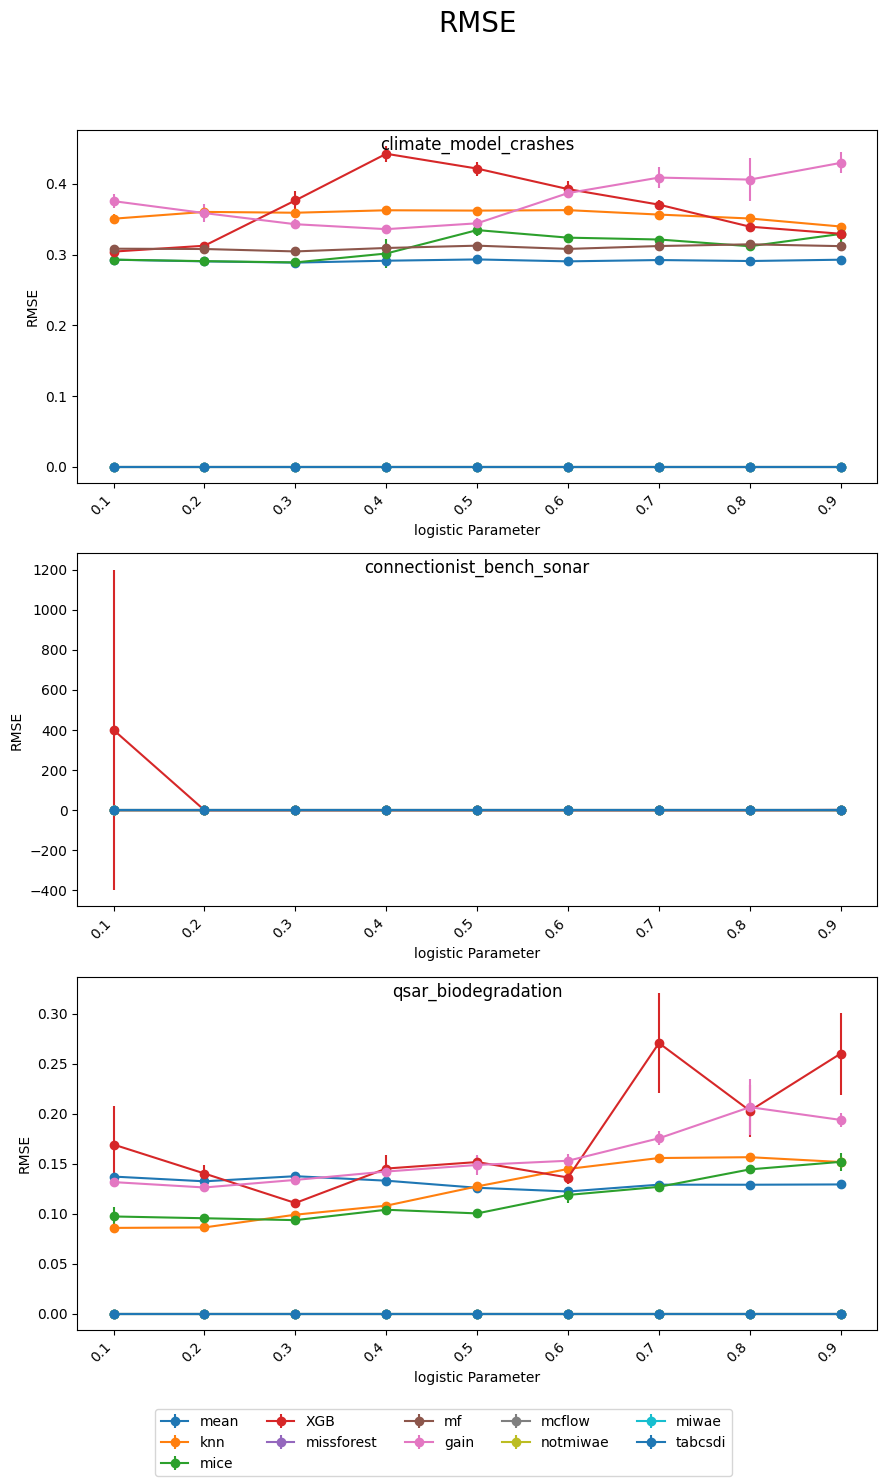

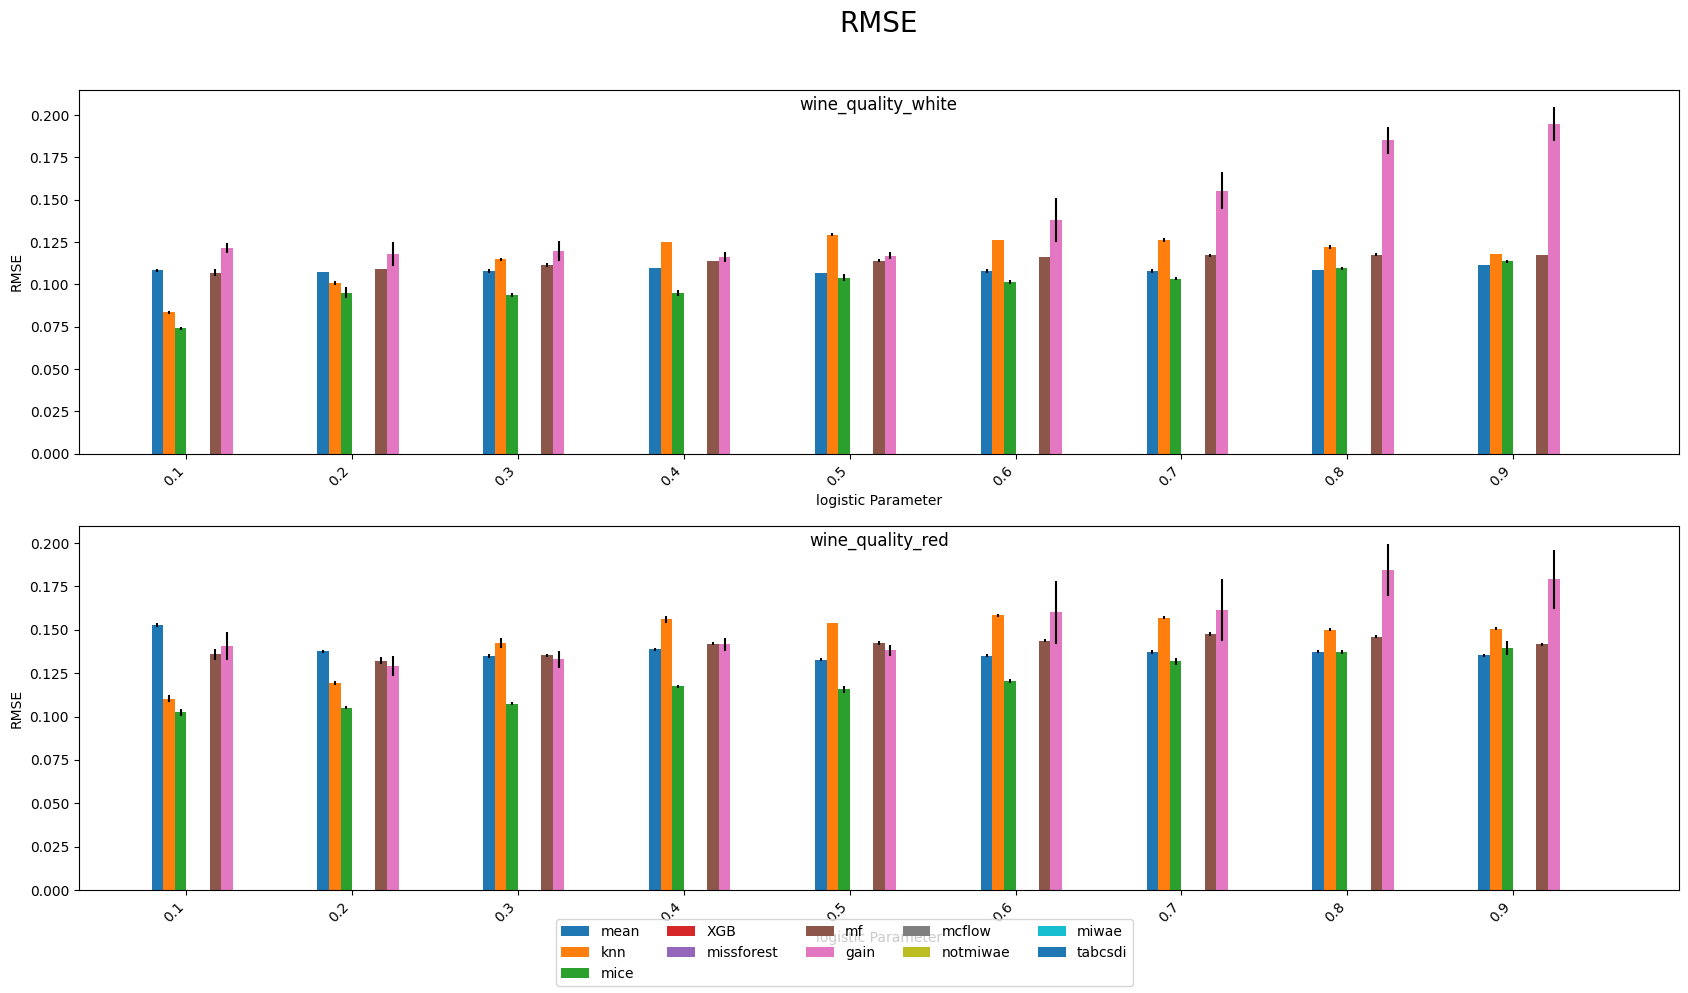

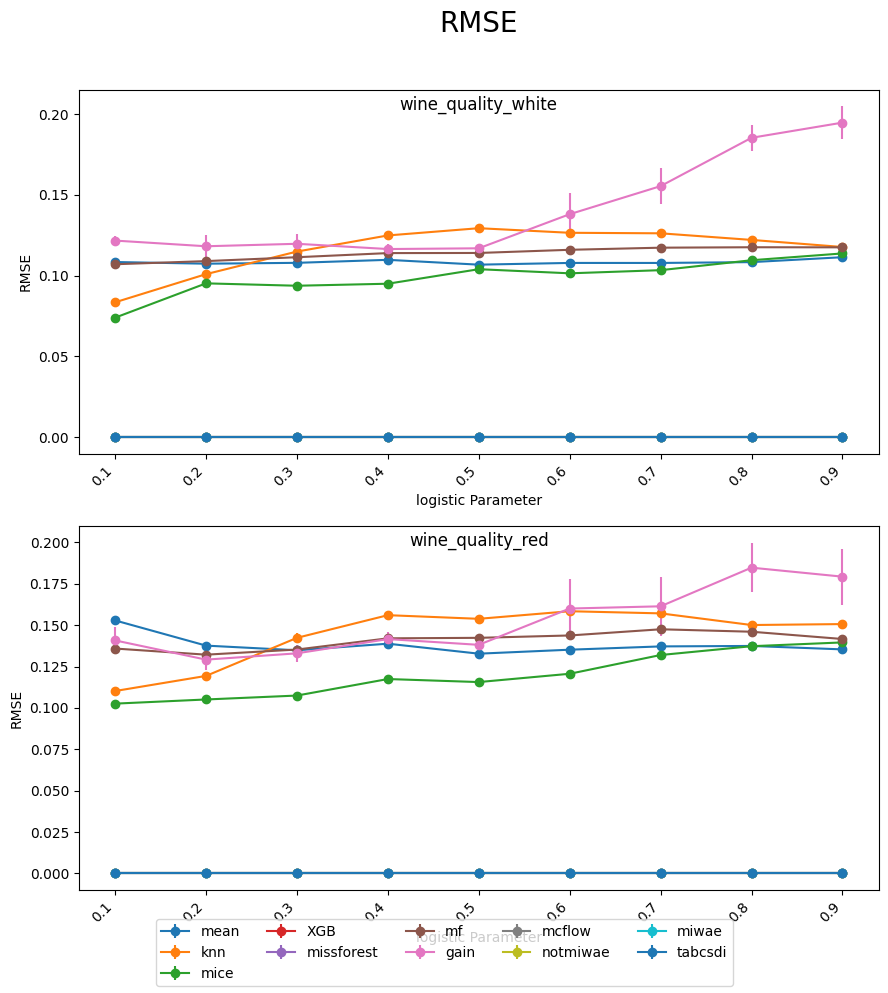

In [93]:
# missing_type = "quantile"
# missing_type = "diffuse"
missing_type = "logistic"

real_datalist = ["banknote","concrete_compression","california"]
train_list,test_list =  make_rmse_list(missing_type,real_datalist,modellist)
make_grouped_bar(train_list,f'RMSE',f'{missing_type} Parameter',[dataname for dataname in real_datalist],f"{missing_type}_RMSE")
make_grouped_line_plot(train_list,f'RMSE',f'{missing_type} Parameter',[dataname for dataname in real_datalist],f"{missing_type}_RMSE")


real_datalist = ["climate_model_crashes","connectionist_bench_sonar","qsar_biodegradation",]
train_list,test_list =  make_rmse_list(missing_type,real_datalist,modellist)
make_grouped_bar(train_list,f'RMSE',f'{missing_type} Parameter',[dataname for dataname in real_datalist],f"{missing_type}_RMSE")
make_grouped_line_plot(train_list,f'RMSE',f'{missing_type} Parameter',[dataname for dataname in real_datalist],f"{missing_type}_RMSE")



real_datalist = ["wine_quality_white","wine_quality_red"]
train_list,test_list =  make_rmse_list(missing_type,real_datalist,modellist)
make_grouped_bar(train_list,f'RMSE',f'{missing_type} Parameter',[dataname for dataname in real_datalist],f"{missing_type}_RMSE")
make_grouped_line_plot(train_list,f'RMSE',f'{missing_type} Parameter',[dataname for dataname in real_datalist],f"{missing_type}_RMSE")

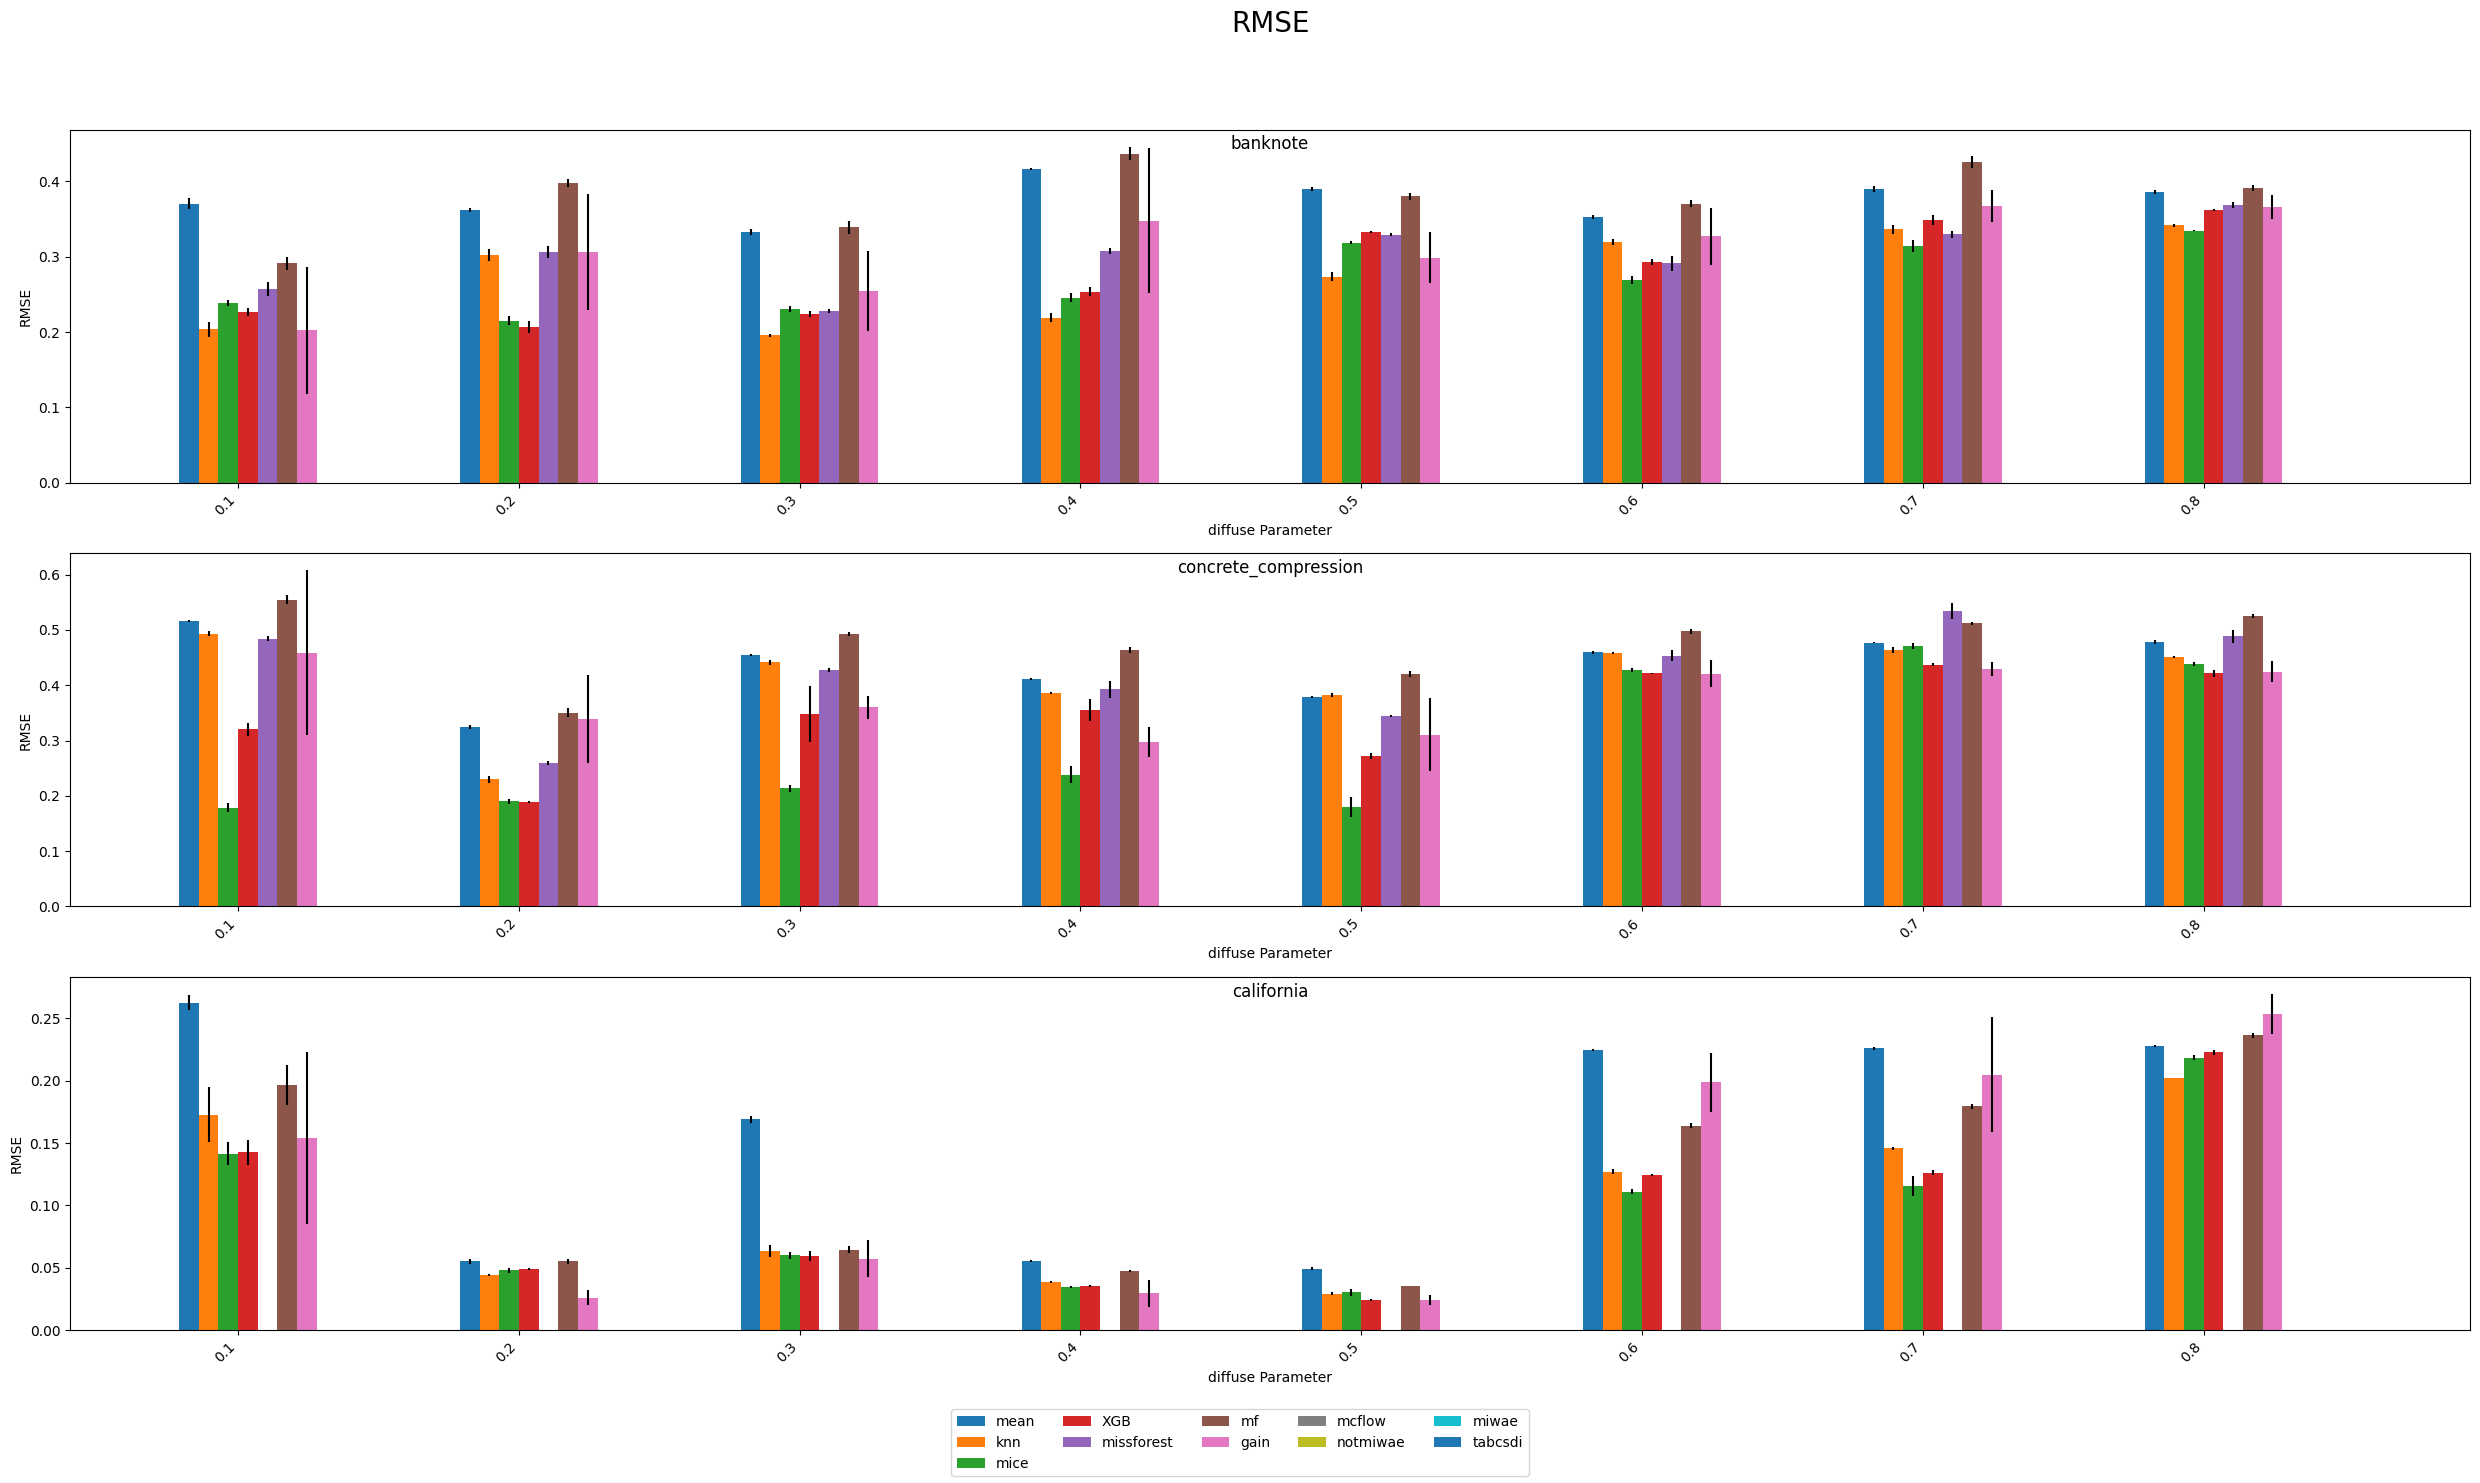

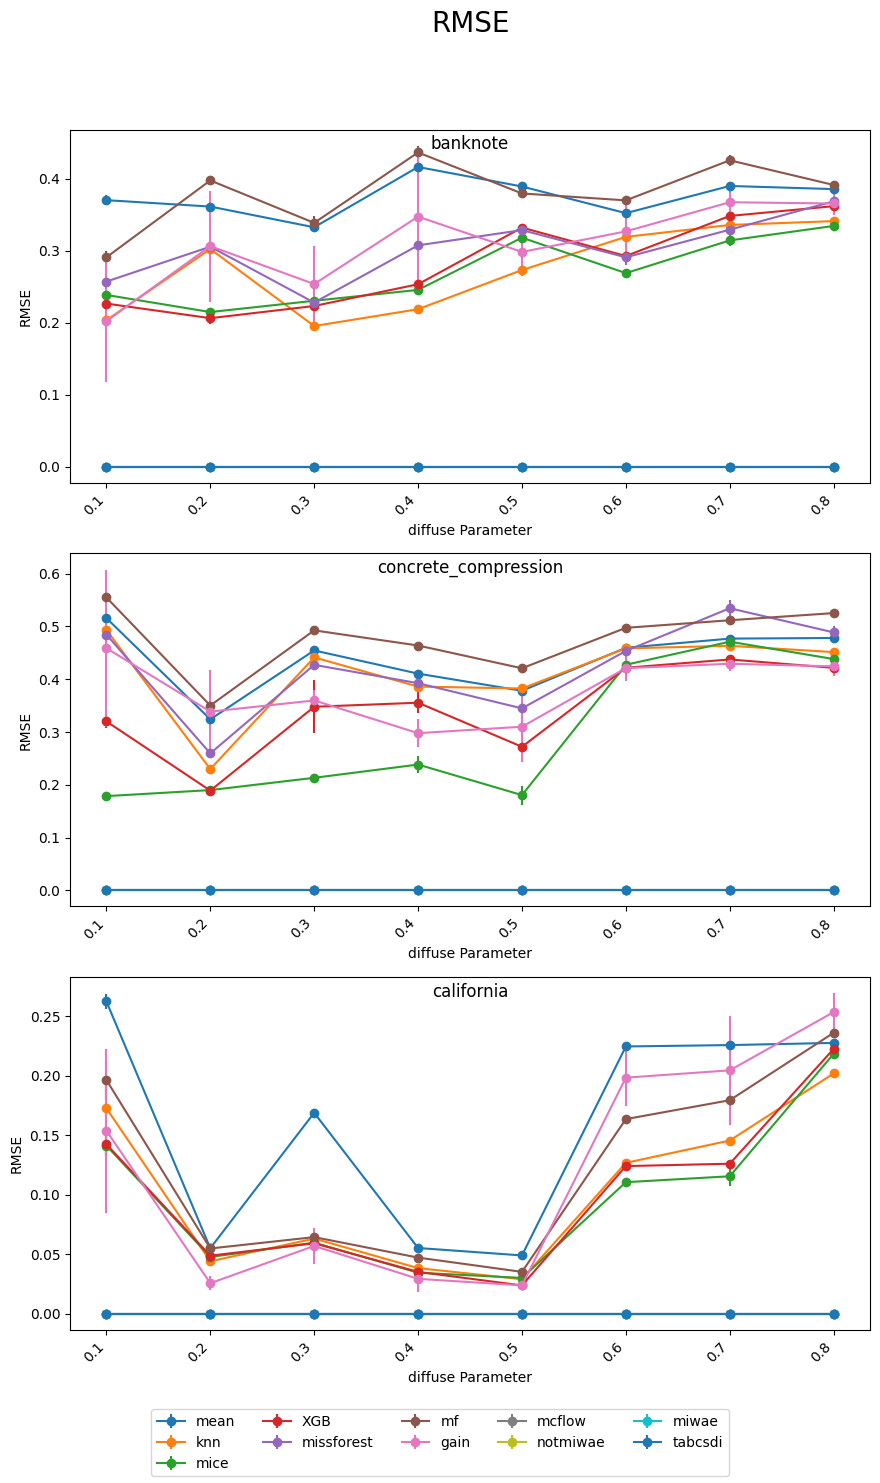

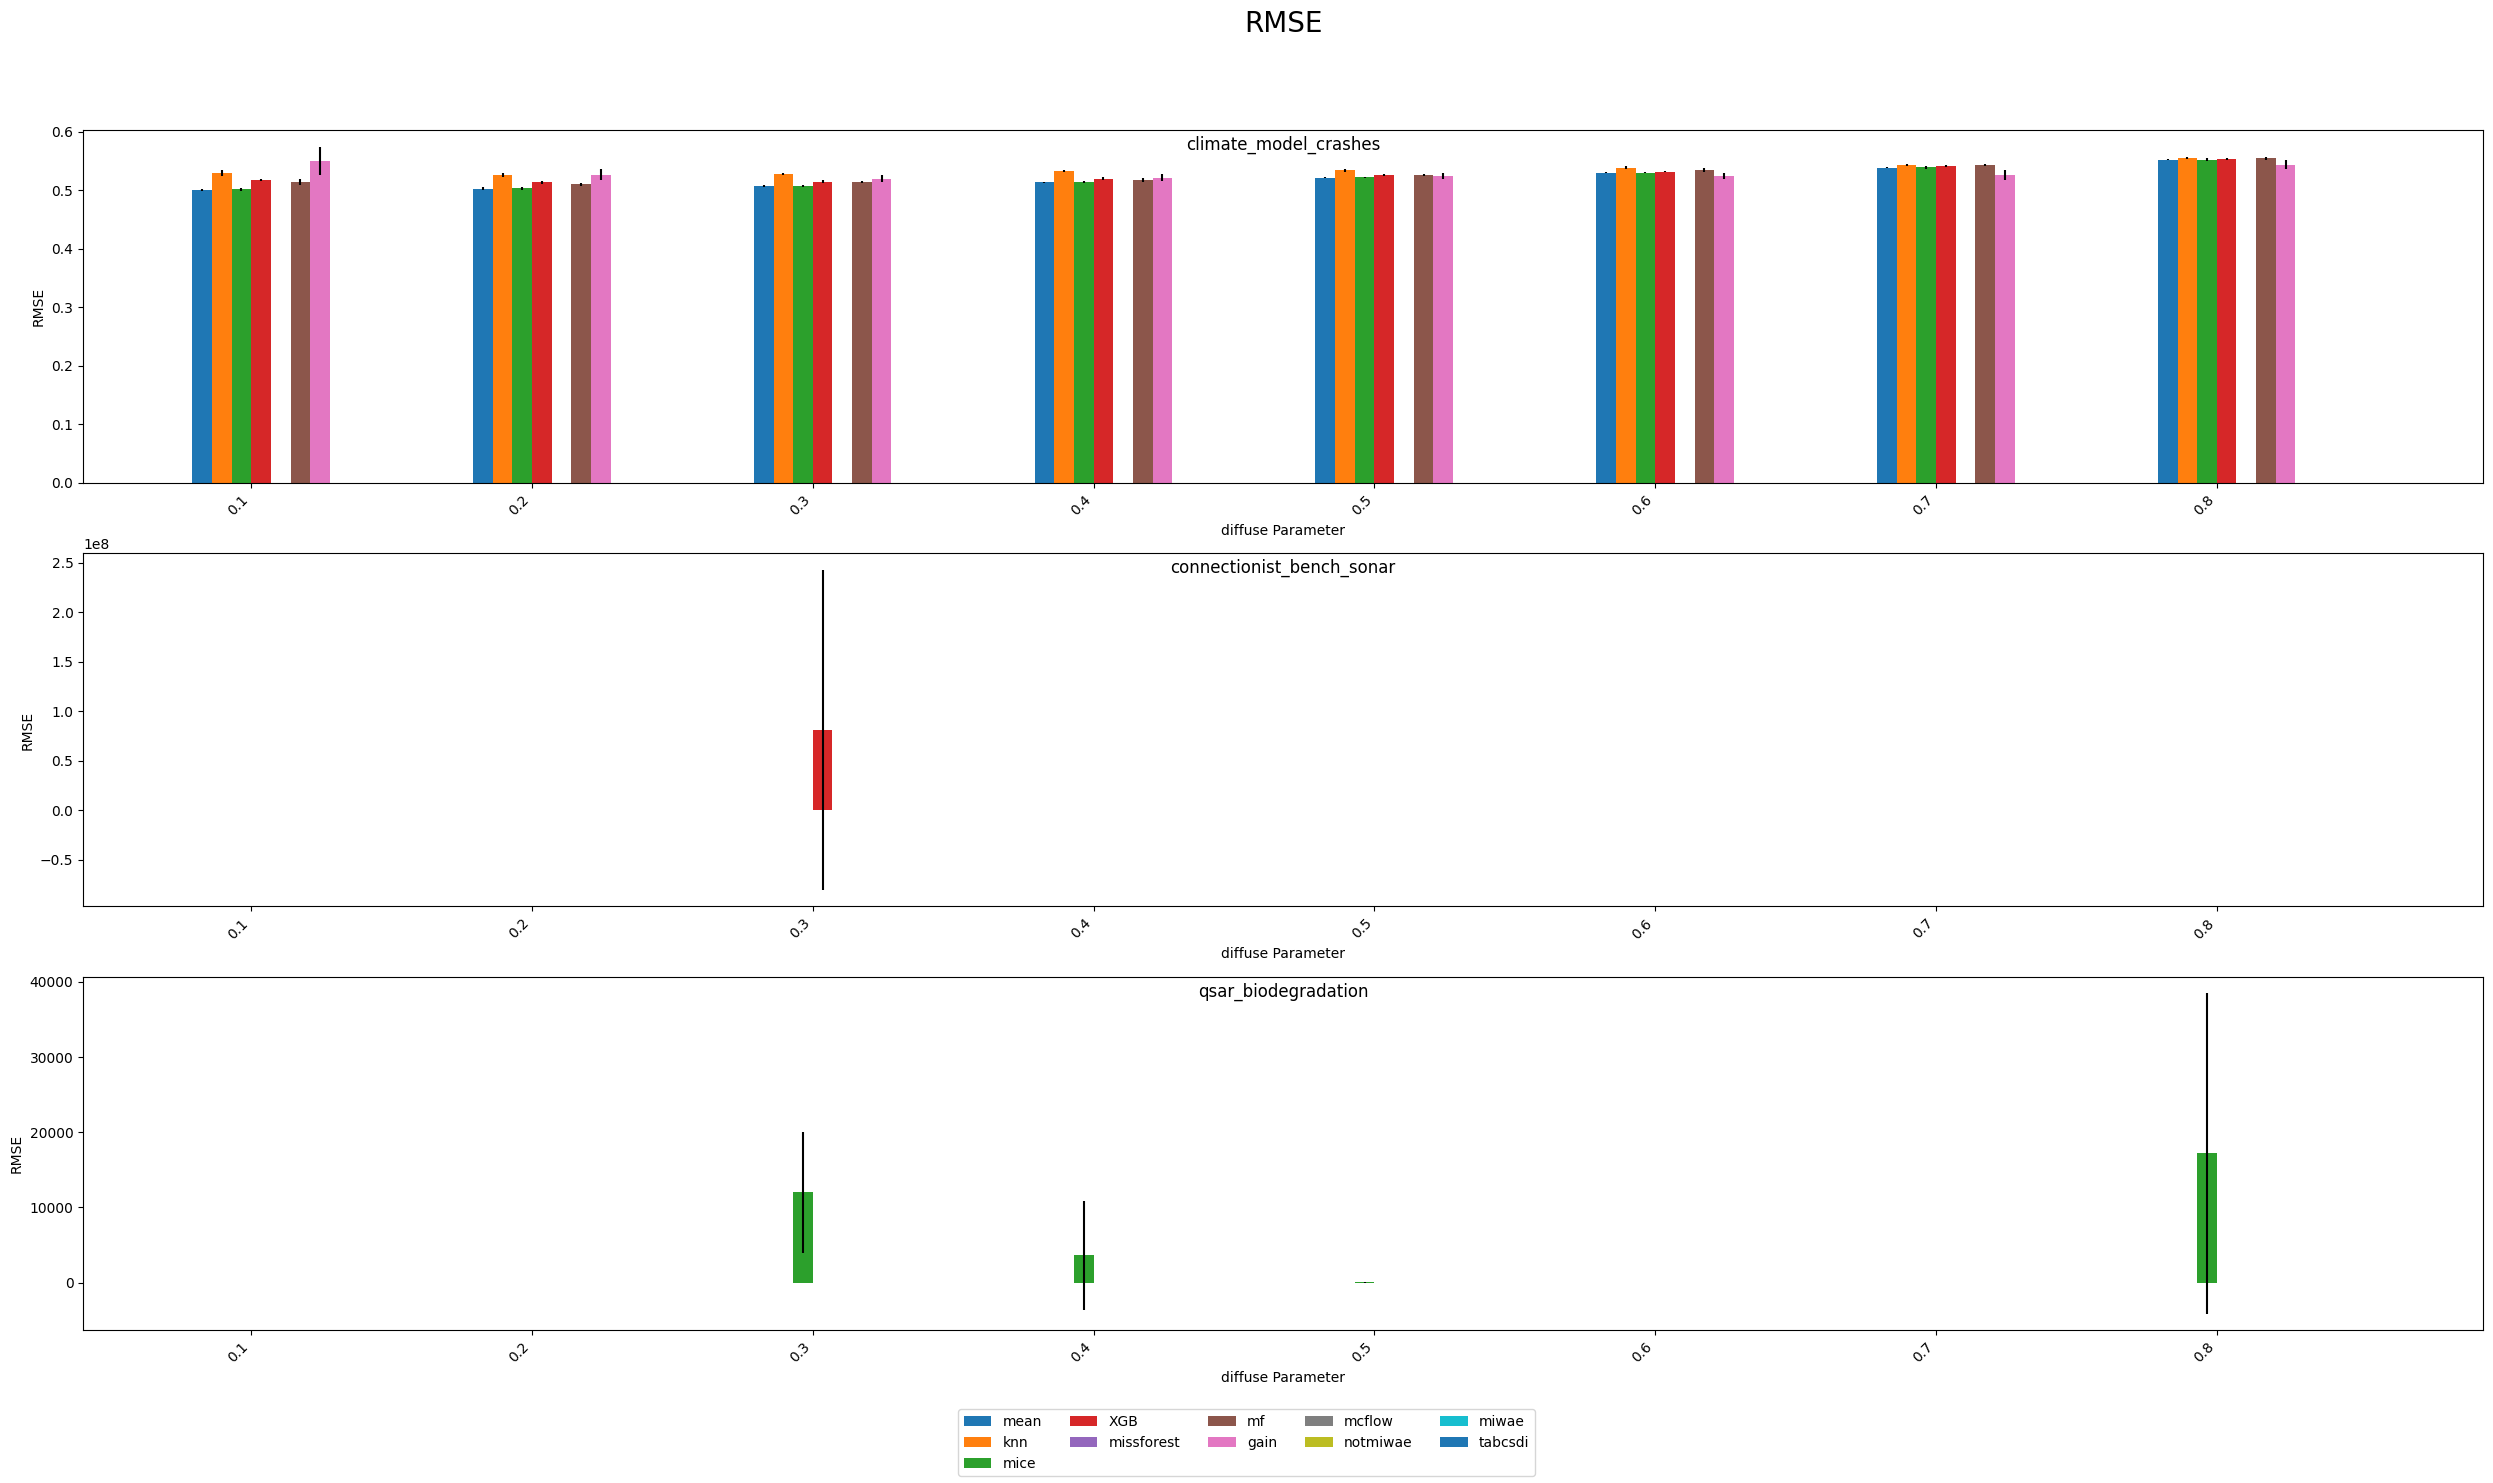

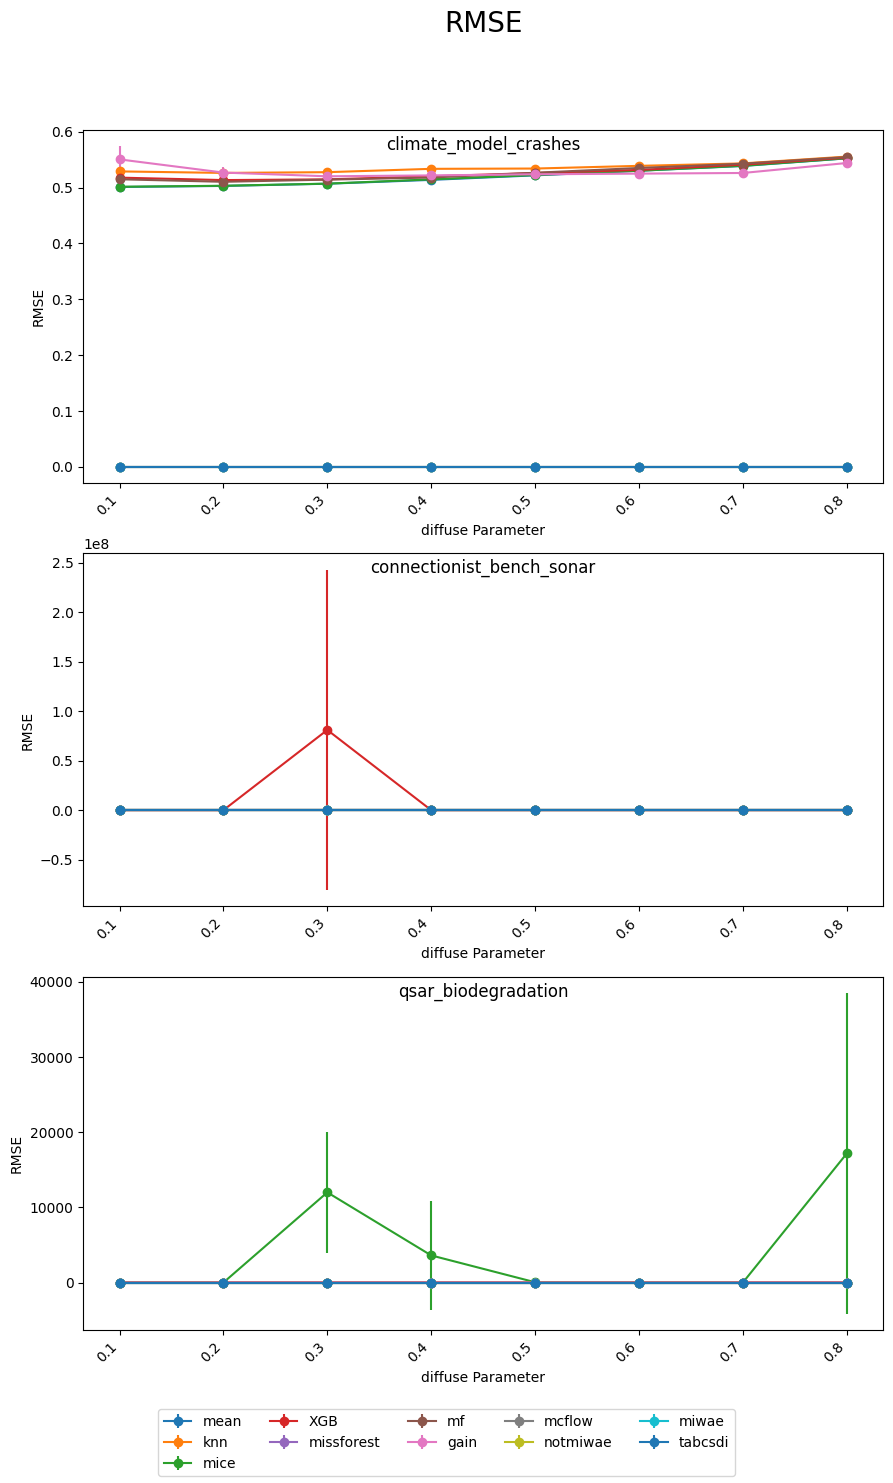

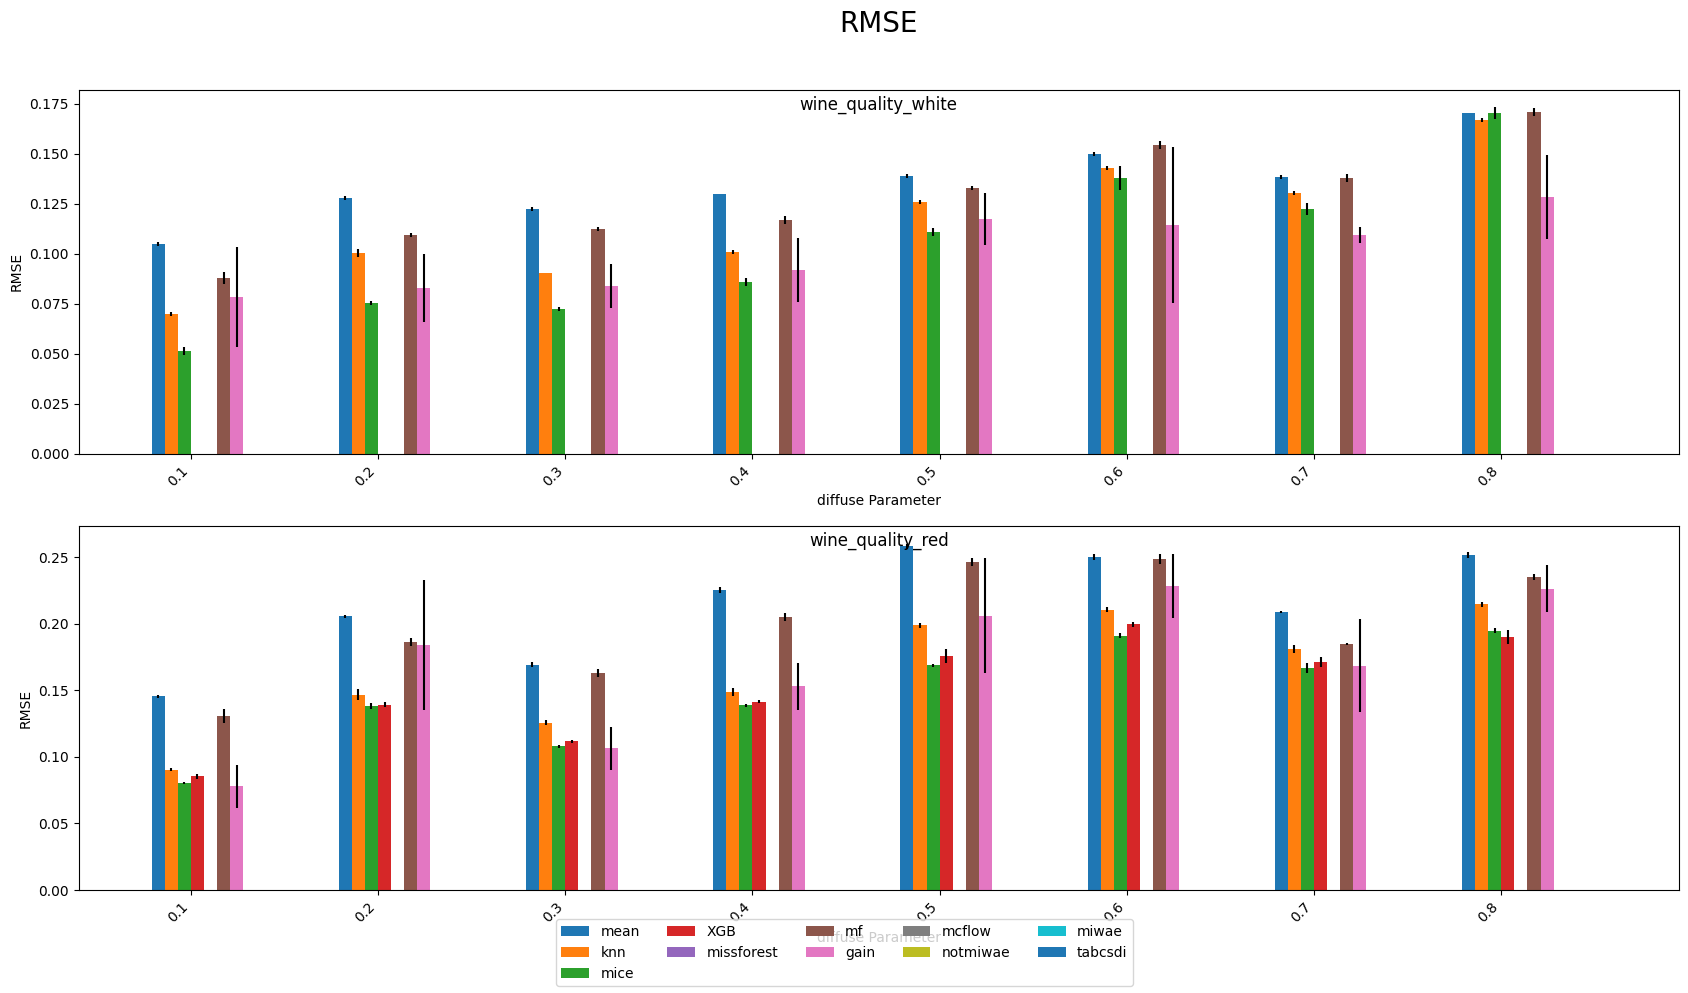

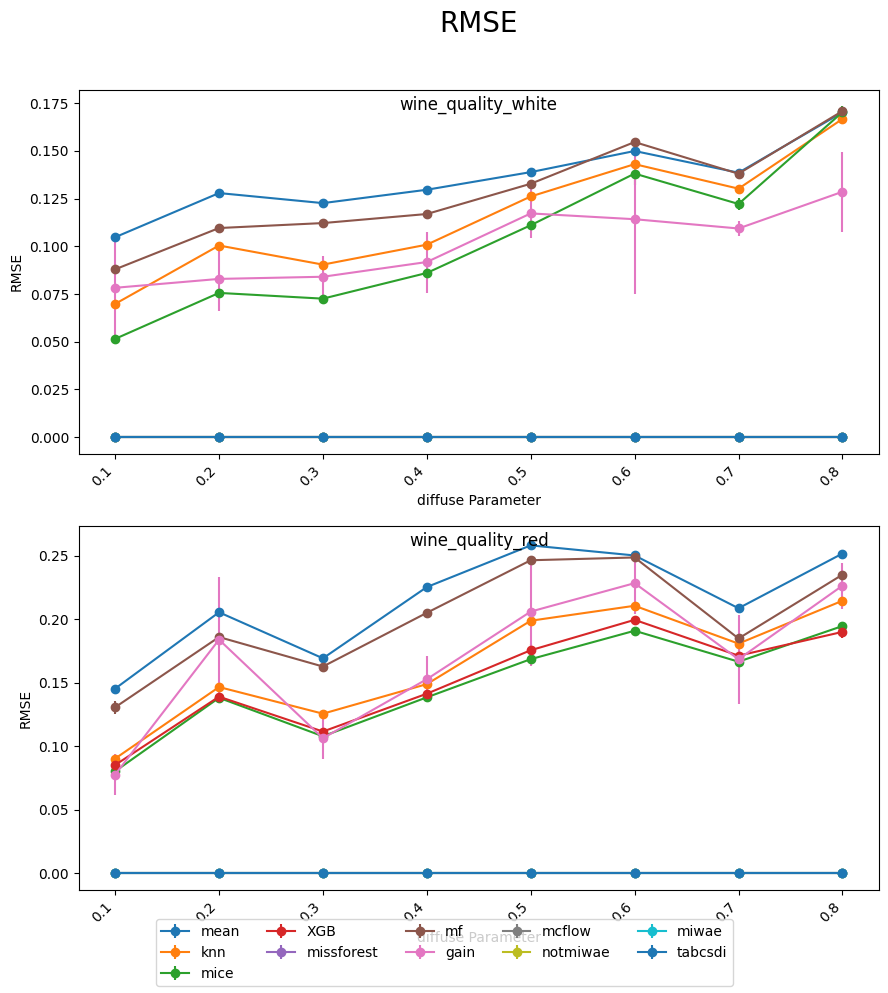

In [94]:
# missing_type = "quantile"
missing_type = "diffuse"
#missing_type = "logistic"

real_datalist = ["banknote","concrete_compression","california"]
train_list,test_list =  make_rmse_list(missing_type,real_datalist,modellist)
make_grouped_bar(train_list,f'RMSE',f'{missing_type} Parameter',[dataname for dataname in real_datalist],f"{missing_type}_RMSE")
make_grouped_line_plot(train_list,f'RMSE',f'{missing_type} Parameter',[dataname for dataname in real_datalist],f"{missing_type}_RMSE")


real_datalist = ["climate_model_crashes","connectionist_bench_sonar","qsar_biodegradation",]
train_list,test_list =  make_rmse_list(missing_type,real_datalist,modellist)
make_grouped_bar(train_list,f'RMSE',f'{missing_type} Parameter',[dataname for dataname in real_datalist],f"{missing_type}_RMSE")
make_grouped_line_plot(train_list,f'RMSE',f'{missing_type} Parameter',[dataname for dataname in real_datalist],f"{missing_type}_RMSE")



real_datalist = ["wine_quality_white","wine_quality_red"]
train_list,test_list =  make_rmse_list(missing_type,real_datalist,modellist)
make_grouped_bar(train_list,f'RMSE',f'{missing_type} Parameter',[dataname for dataname in real_datalist],f"{missing_type}_RMSE")
make_grouped_line_plot(train_list,f'RMSE',f'{missing_type} Parameter',[dataname for dataname in real_datalist],f"{missing_type}_RMSE")

## Banknote Logistic DL approach

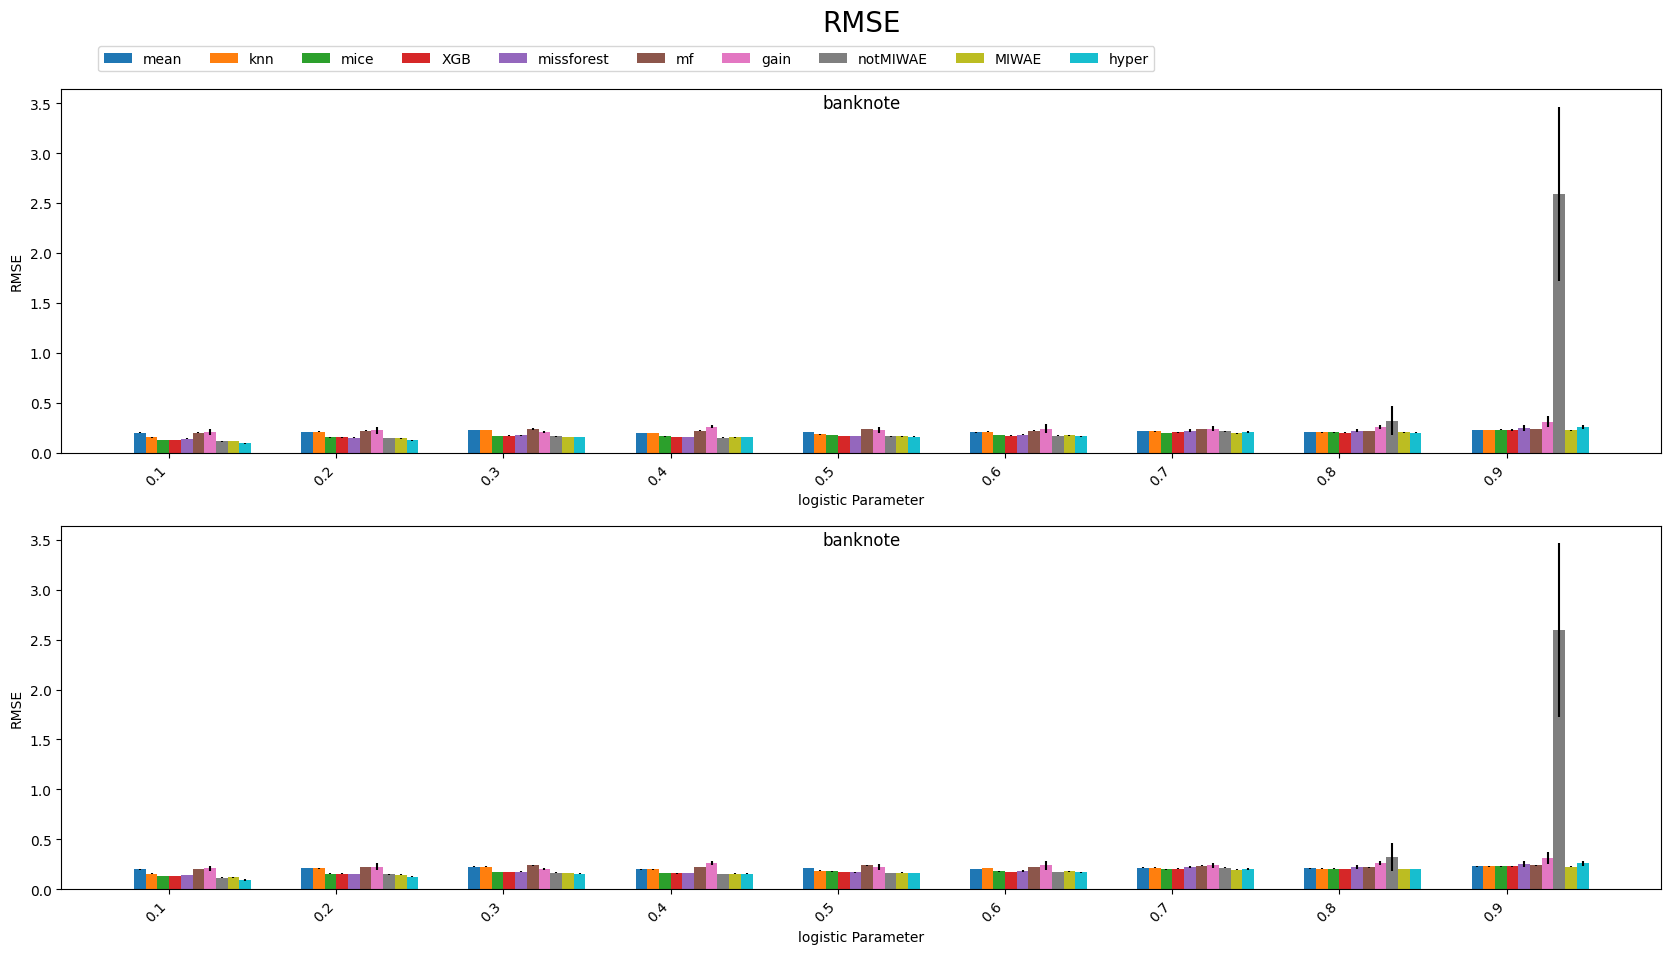

In [19]:
syn_datalist = ["banknote","banknote"]


missingtypelist = ["logistic"]
modellist = ["mean","knn","mice","XGB","missforest","mf","gain","notMIWAE","MIWAE","hyper"]


for missingtype in missingtypelist:
    train_list = []
    test_list = []
    for dataname in syn_datalist:
        train_df = pd.DataFrame()
        test_df = pd.DataFrame()
        for model in modellist:
            path = f"../results/{missingtype}/{dataname}"
            data = pd.read_csv(f"{path}/{model}/{missingtype}_RMSE.csv",index_col=0)
            

            train_df[f'{model}'] = data['train_rmse_mean'].map('{:.5f}'.format) + ' ± ' + data['train_rmse_std'].map('{:.3f}'.format)
            test_df[f'{model}'] = data['test_rmse_mean'].map('{:.5f}'.format) + ' ± ' + data['test_rmse_std'].map('{:.3f}'.format)
        train_df.to_csv(f"{path}/RMSE_train_results.csv")
        test_df.to_csv(f"{path}/RMSE_test_results.csv")
        train_list.append(train_df)
        test_list.append(test_df)

    make_grouped_bar(train_list,'RMSE',f'{missingtype} Parameter',[dataname for dataname in syn_datalist])

## Banknote Logistic DL approach (except notMIWAE)

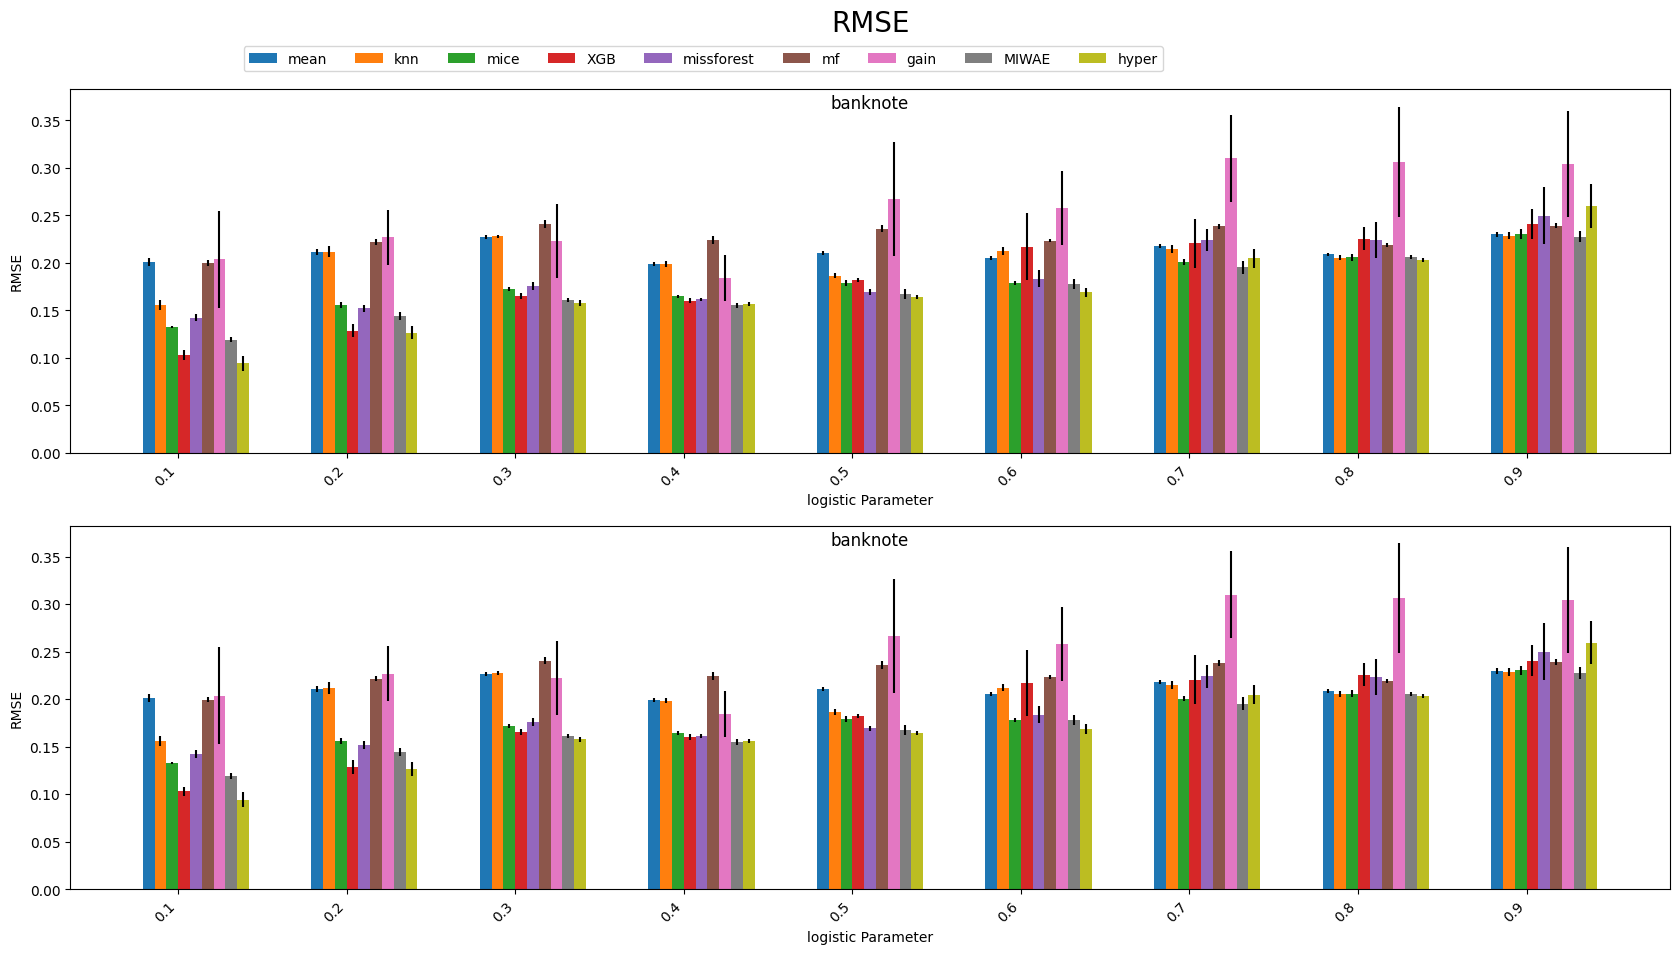

In [45]:
syn_datalist = ["banknote","banknote"]


missingtypelist = ["logistic"]
modellist = ["mean","knn","mice","XGB","missforest","mf","gain","MIWAE","hyper"]


for missingtype in missingtypelist:
    train_list = []
    test_list = []
    for dataname in syn_datalist:
        train_df = pd.DataFrame()
        test_df = pd.DataFrame()
        for model in modellist:
            path = f"../results/{missingtype}/{dataname}"
            data = pd.read_csv(f"{path}/{model}/{missingtype}_RMSE.csv",index_col=0)
            

            train_df[f'{model}'] = data['train_rmse_mean'].map('{:.5f}'.format) + ' ± ' + data['train_rmse_std'].map('{:.3f}'.format)
            test_df[f'{model}'] = data['test_rmse_mean'].map('{:.5f}'.format) + ' ± ' + data['test_rmse_std'].map('{:.3f}'.format)
        train_df.to_csv(f"{path}/RMSE_train_results.csv")
        test_df.to_csv(f"{path}/RMSE_test_results.csv")
        train_list.append(train_df)
        test_list.append(test_df)

    make_grouped_bar(train_list,'RMSE',f'{missingtype} Parameter',[dataname for dataname in syn_datalist])


## Syn Logistic DL approach

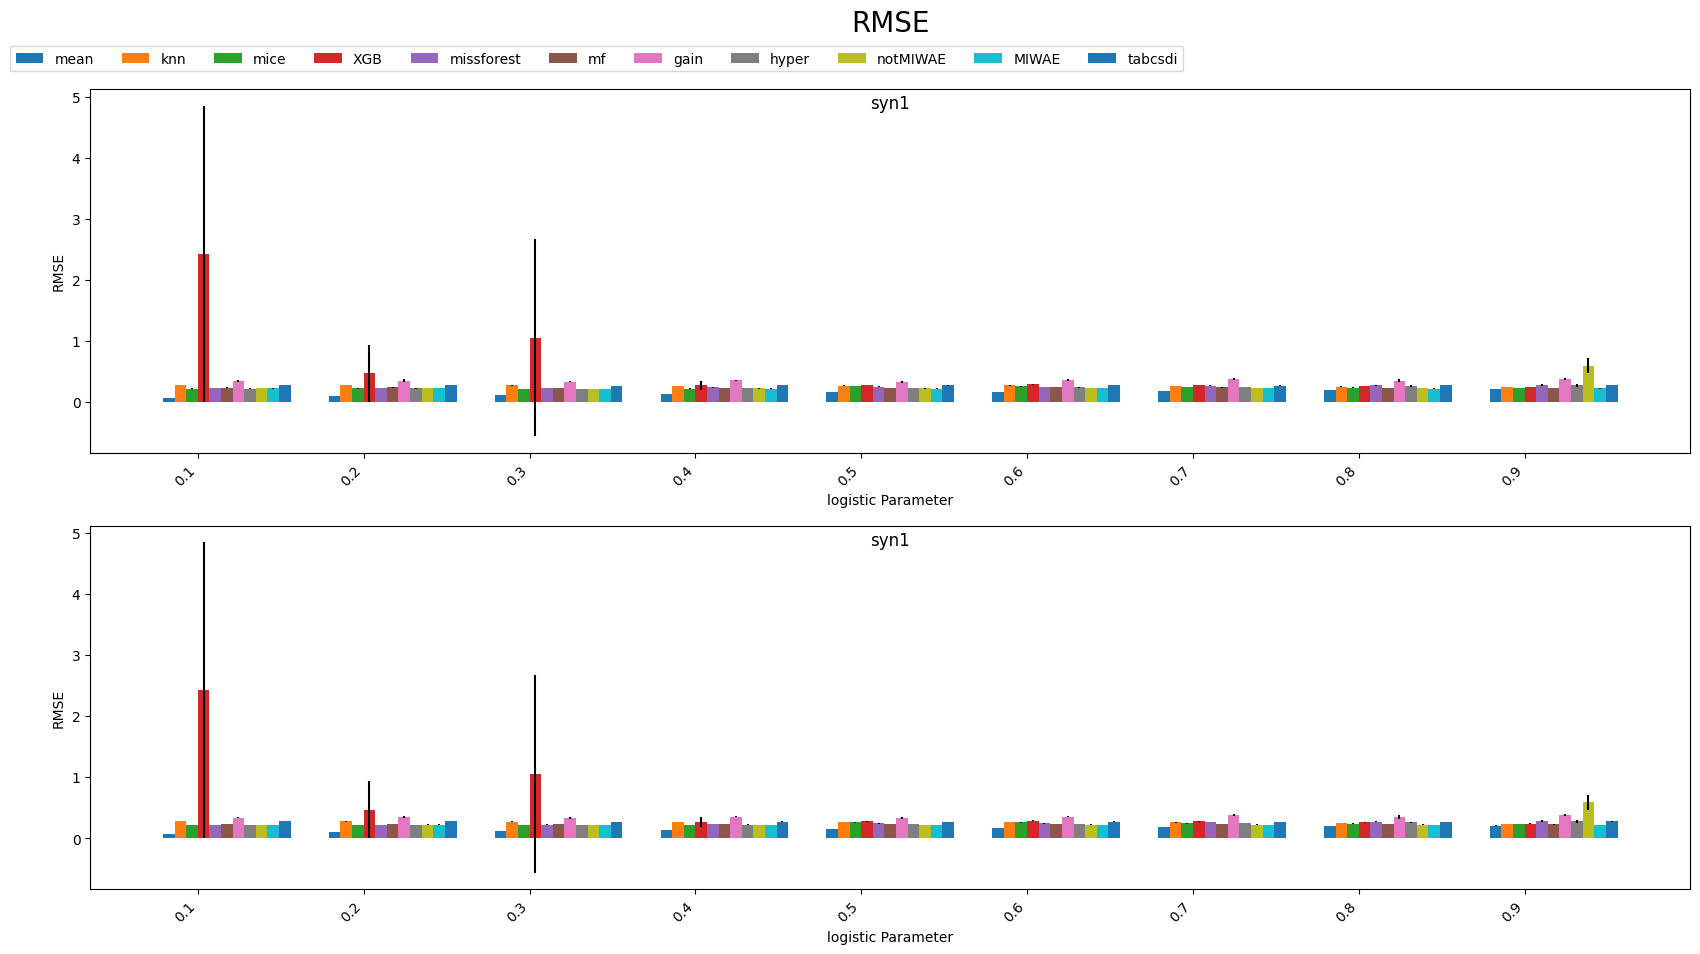

In [47]:
syn_datalist = ["syn1","syn1"]


missingtypelist = ["logistic"]
modellist = ["mean","knn","mice","XGB","missforest","mf","gain","hyper","notMIWAE","MIWAE","tabcsdi"]


for missingtype in missingtypelist:
    train_list = []
    test_list = []
    for dataname in syn_datalist:
        train_df = pd.DataFrame()
        test_df = pd.DataFrame()
        for model in modellist:
            path = f"../results/{missingtype}/{dataname}"
            data = pd.read_csv(f"{path}/{model}/{missingtype}_RMSE.csv",index_col=0)
            

            train_df[f'{model}'] = data['train_rmse_mean'].map('{:.5f}'.format) + ' ± ' + data['train_rmse_std'].map('{:.3f}'.format)
            test_df[f'{model}'] = data['test_rmse_mean'].map('{:.5f}'.format) + ' ± ' + data['test_rmse_std'].map('{:.3f}'.format)
        train_df.to_csv(f"{path}/RMSE_train_results.csv")
        test_df.to_csv(f"{path}/RMSE_test_results.csv")
        train_list.append(train_df)
        test_list.append(test_df)

    make_grouped_bar(train_list,'RMSE',f'{missingtype} Parameter',[dataname for dataname in syn_datalist])

## Syn Logistic DL approach (Except XGB)

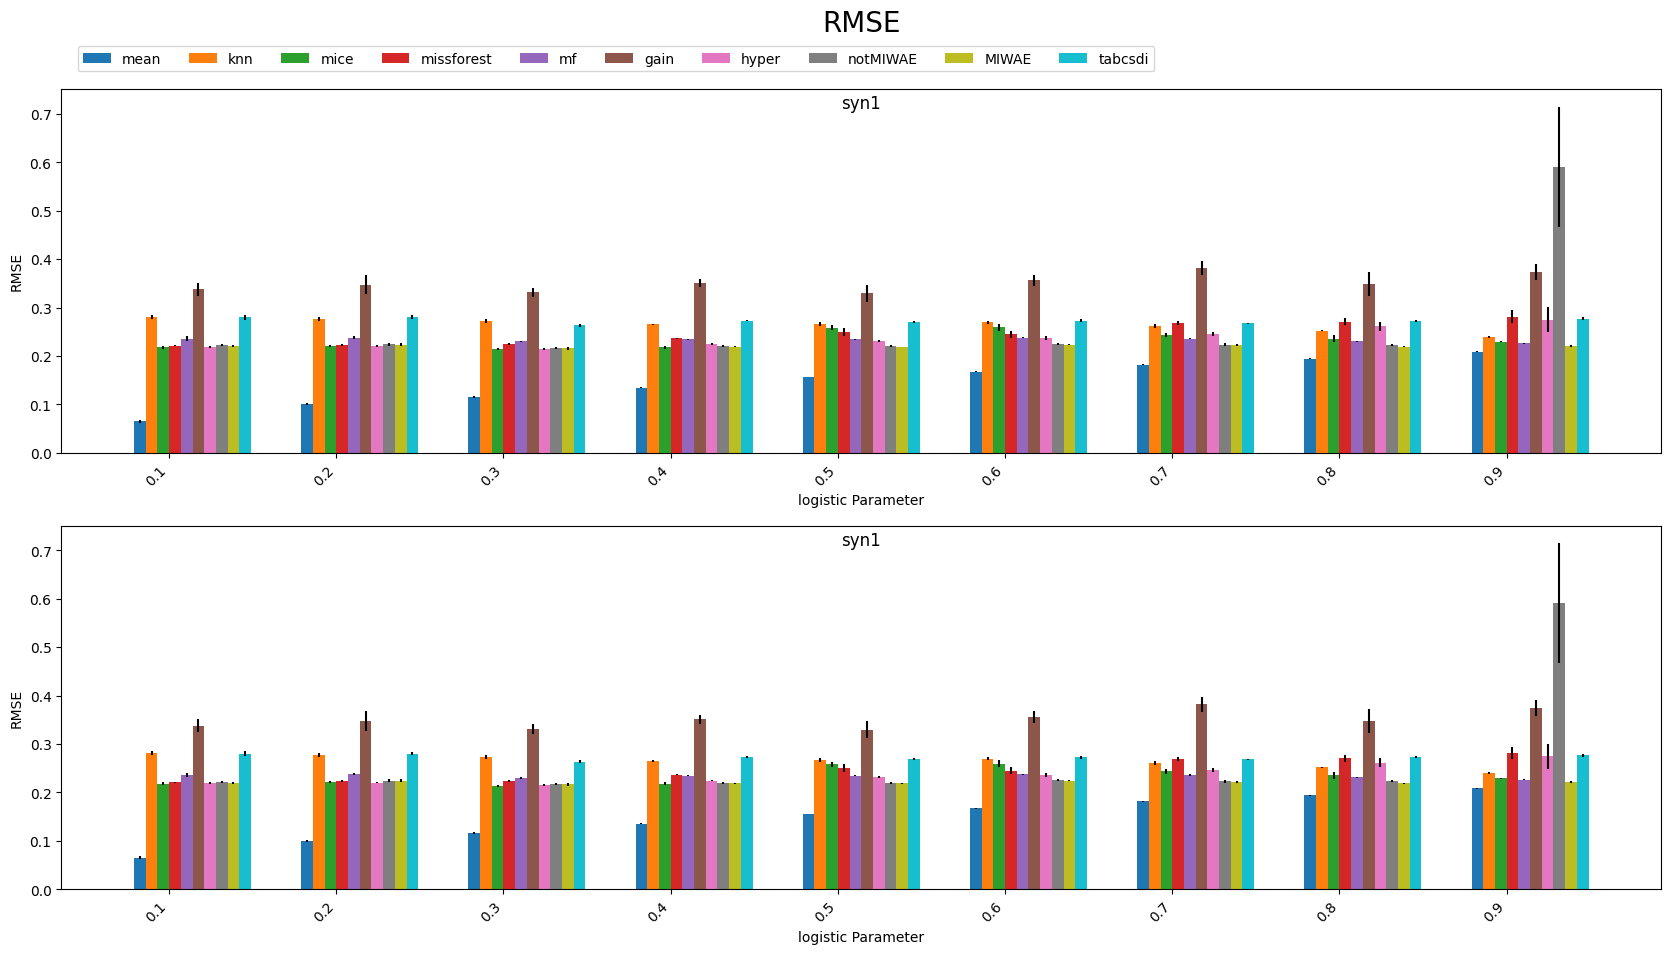

In [48]:
syn_datalist = ["syn1","syn1"]


missingtypelist = ["logistic"]
modellist = ["mean","knn","mice","missforest","mf","gain","hyper","notMIWAE","MIWAE","tabcsdi"]


for missingtype in missingtypelist:
    train_list = []
    test_list = []
    for dataname in syn_datalist:
        train_df = pd.DataFrame()
        test_df = pd.DataFrame()
        for model in modellist:
            path = f"../results/{missingtype}/{dataname}"
            data = pd.read_csv(f"{path}/{model}/{missingtype}_RMSE.csv",index_col=0)
            

            train_df[f'{model}'] = data['train_rmse_mean'].map('{:.5f}'.format) + ' ± ' + data['train_rmse_std'].map('{:.3f}'.format)
            test_df[f'{model}'] = data['test_rmse_mean'].map('{:.5f}'.format) + ' ± ' + data['test_rmse_std'].map('{:.3f}'.format)
        train_df.to_csv(f"{path}/RMSE_train_results.csv")
        test_df.to_csv(f"{path}/RMSE_test_results.csv")
        train_list.append(train_df)
        test_list.append(test_df)

    make_grouped_bar(train_list,'RMSE',f'{missingtype} Parameter',[dataname for dataname in syn_datalist])

In [88]:
def make_grouped_line_plot(dataframelist, ylabel, xlabel, title, savetitle="RMSELINE"):
    # Data from your dataset
    index_levels = dataframelist[0].index
    methods = dataframelist[0].columns

    x = np.arange(len(index_levels))  # the label locations
    ndf = len(dataframelist)
    fig, axs = plt.subplots(ndf, figsize=(10 , 5 * ndf))

    for dataname_i in range(ndf):
        dataframe = dataframelist[dataname_i]
        mean_df, std_df = split_mean_std(dataframe)

        ax = axs[dataname_i]
        # Creating lines for each method
        for i, method in enumerate(methods):
            mean_values_for_method = mean_df[method]
            ax.errorbar(x, mean_values_for_method, yerr=std_df[method], label=method, marker='o', linestyle='-')

        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax.set_ylabel(ylabel)
        ax.set_xlabel(xlabel)
        ax.set_title(title[dataname_i], y=1.0, pad=-14)
        ax.set_xticks(x)
        ax.set_xticklabels(index_levels, rotation=45, ha='right')

        handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, ncol=len(methods)//2, 
               #bbox_to_anchor=(0, 1, 0.65, -0.05),
               loc =  'outside lower center')

    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9)
    
    fig.suptitle('RMSE', fontsize=20)
    plt.savefig(f"../plot/{savetitle}_line_{dataname_i}.png")    
    plt.show()    
    plt.show()

In [89]:
def make_grouped_bar(dataframelist,ylabel,xlabel,title,savetitle = "RMSEBAR"):
    # Data from your dataset
    index_levels = dataframelist[0].index
    methods = dataframelist[0].columns

    x = np.arange(len(index_levels))  # the label locations
    width = 0.07  # the width of the bars

    ndf = len(dataframelist)
    fig, axs = plt.subplots(ndf,figsize=(10*ndf, 5*ndf))

    for dataname_i in range(ndf):
        dataframe = dataframelist[dataname_i]
        mean_df,std_df = split_mean_std(dataframe)

        ax = axs[dataname_i]
        # Creating bars for each method
        for i, method in enumerate(methods):
            mean_values_for_method = mean_df[method]
            rects = ax.bar(x + i * width, mean_values_for_method, width, label=method,yerr=std_df[method])

        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax.set_ylabel(ylabel)
        ax.set_xlabel(xlabel)
        ax.set_title(title[dataname_i],y=1.0, pad=-14)
        ax.set_xticks(x + width * 2.5)
        ax.set_xticklabels(index_levels,rotation=45, ha='right')
        #ax.legend(ncol=len(methods),bbox_to_anchor=(0, 1., 0.9, 0.2))
        handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, ncol=len(methods)//2
               ,loc =  'outside lower center'
               #,bbox_to_anchor=(0,1, 0.65, -0.05,)
               )
    #plt.subplots_adjust(bottom=0.4)

    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9
                    )
    
    fig.suptitle(f'RMSE', fontsize=20)
    plt.savefig(f"../plot/{savetitle}_{dataname_i}.png")    
    plt.show()

In [13]:
def make_grouped_bar_single(dataframe,ylabel,xlabel,title):
    # Data from your dataset
    index_levels = dataframe.index
    methods = dataframe.columns

    mean_df,std_df = split_mean_std(dataframe)
    
    x = np.arange(len(index_levels))  # the label locations
    width = 0.1  # the width of the bars

    fig, ax = plt.subplots(figsize=(12, 7))

    # Creating bars for each method
    for i, method in enumerate(methods):
        mean_values_for_method = mean_df[method]
        rects = ax.bar(x + i * width, mean_values_for_method, width, label=method,yerr=std_df[method])

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_title(title,y=1.0, pad=-14)
    ax.set_xticks(x + width * 2.5)
    ax.set_xticklabels(index_levels,rotation=60,ha = "right")
    ax.legend(ncol=len(methods),bbox_to_anchor=(0, 1., 0.9, 0.2))
    plt.subplots_adjust(bottom=0.4)

    plt.show()

## Downstream Tasks

In [214]:
def ml_tasks(dataname):
    if dataname in ["concrete_compression",
            "wine_quality_white","wine_quality_red",
            "california","yacht_hydrodynamics"
            ]:
        return "ML_rmse"
    
    else:
        return"ML_f1"
    

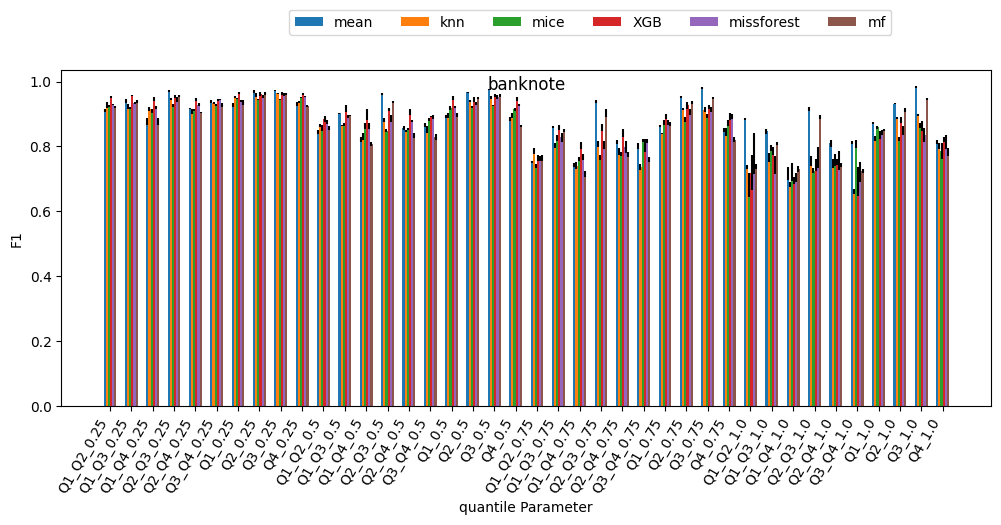

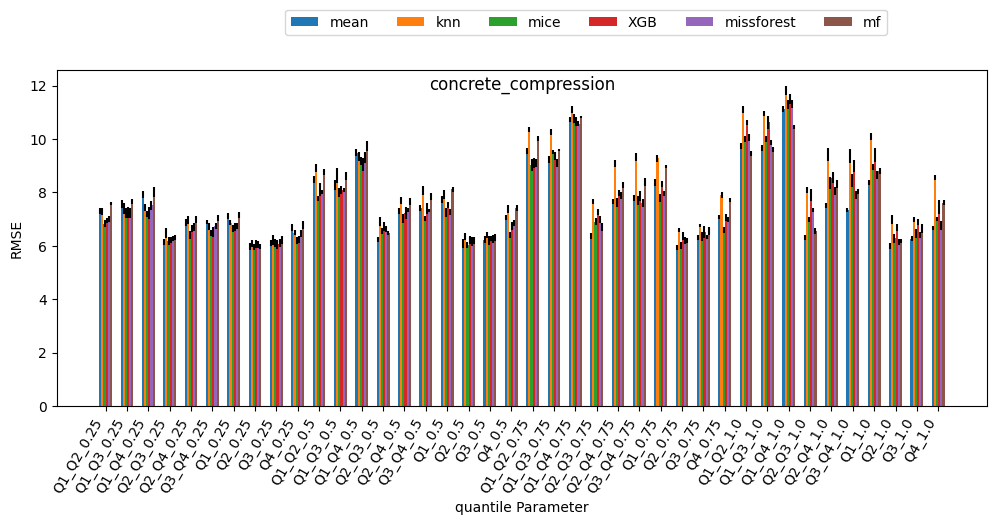

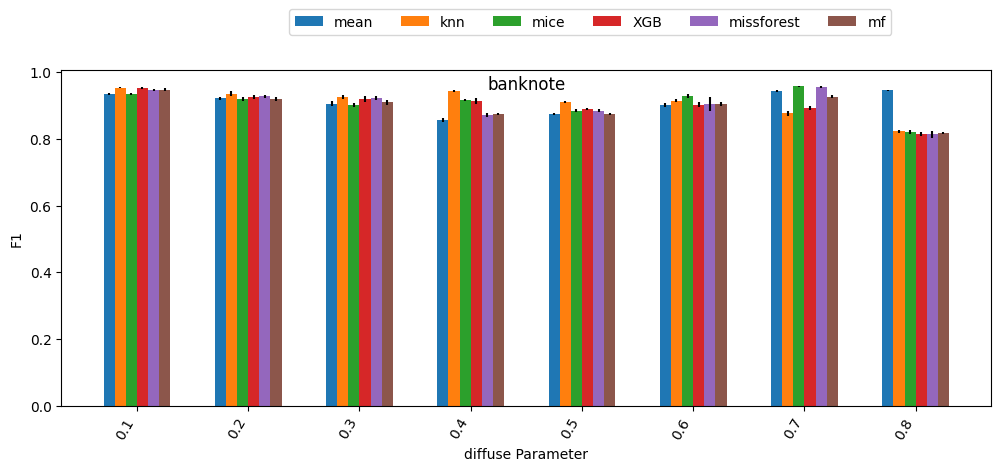

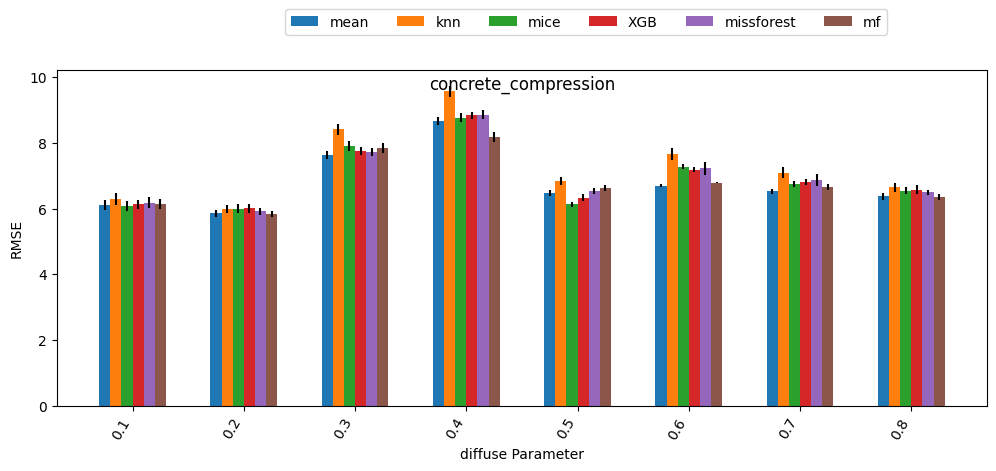

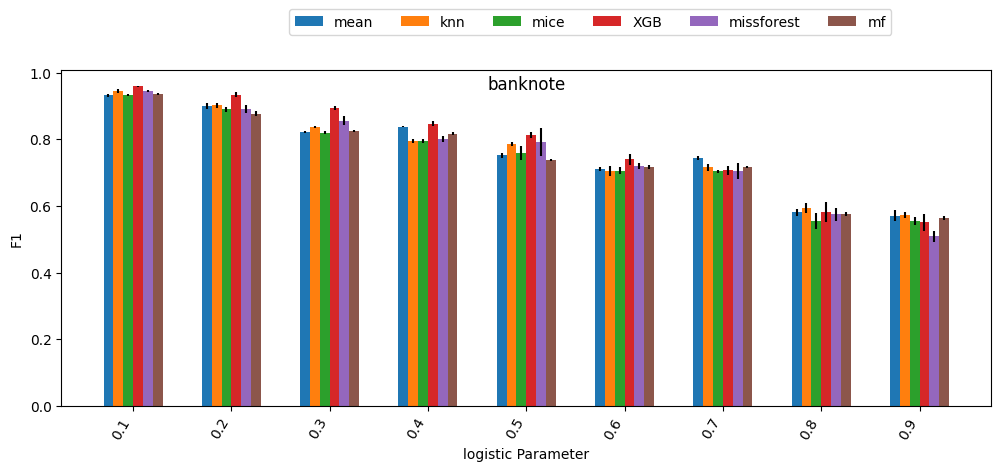

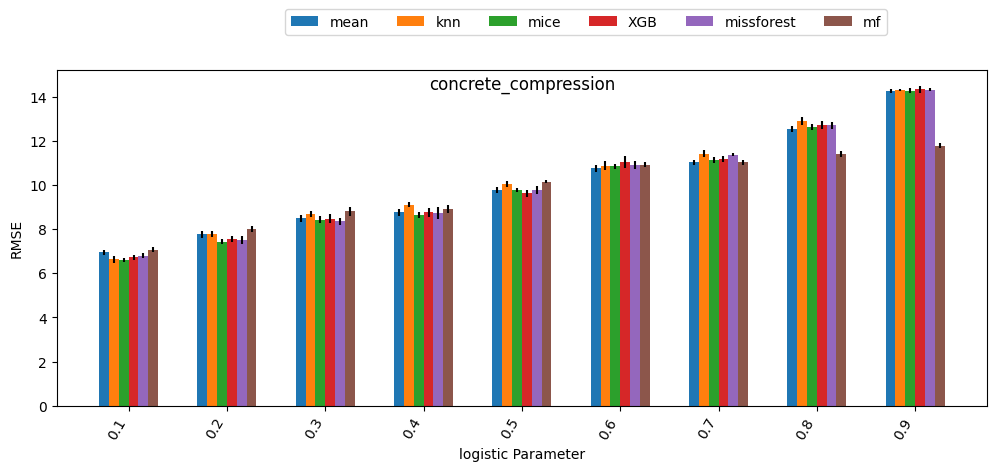

In [235]:
for missingtype in missingtypelist:
    train_list = []
    test_list = []
    for dataname in real_datalist:
        train_df = pd.DataFrame()
        test_df = pd.DataFrame()
        for model in modellist:
            path = f"../results/{missingtype}/{dataname}"
            if dataname in ["concrete_compression","wine_quality_white","wine_quality_red","california","yacht_hydrodynamics"]:
                reg = True
            else:
                reg = False                
            if reg:
                data = pd.read_csv(f"{path}/{model}/{missingtype}_ML_rmse.csv",index_col=0)
                train_df[f'{model}'] = data['train_ML_rmse_mean'].map('{:.5f}'.format) + ' ± ' + data['train_ML_rmse_std'].map('{:.3f}'.format)
                test_df[f'{model}'] = data['test_ML_rmse_mean'].map('{:.5f}'.format) + ' ± ' + data['test_ML_rmse_std'].map('{:.3f}'.format)
                train_df.to_csv(f"{path}/ML_RMSE_train_results.csv")
                test_df.to_csv(f"{path}/ML_RMSE_test_results.csv")
                
            else:
                data = pd.read_csv(f"{path}/{model}/{missingtype}_ML_f1.csv",index_col=0)
                train_df[f'{model}'] = data['train_ML_f1_mean'].map('{:.5f}'.format) + ' ± ' + data['train_ML_f1_std'].map('{:.3f}'.format)
                test_df[f'{model}'] = data['test_ML_f1_mean'].map('{:.5f}'.format) + ' ± ' + data['test_ML_f1_std'].map('{:.3f}'.format)
                train_df.to_csv(f"{path}/ML_f1_train_results.csv")
                test_df.to_csv(f"{path}/ML_f1_test_results.csv")
            
        if reg:
            make_grouped_bar_single(train_df,'RMSE',f'{missingtype} Parameter',dataname)
        else:
            make_grouped_bar_single(train_df,'F1',f'{missingtype} Parameter',dataname)


        # train_list.append(train_df)
        # test_list.append(test_df)

